# EDA and bicycle usage: CDMX's Ecobici.

## Data Reading and Consolidation (Stations Dataset)

Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import FuncFormatter 
from unidecode import unidecode
pd.options.display.float_format = '{:.1f}'.format

In [2]:
dfs = pd.read_csv("estaciones.csv")

#### Changing column names

In [3]:
# Define the new column names
new_column_names = {
    'sistema': 'System',
    'num_cicloe': 'Station_ID',
    'calle_prin': 'Main_Street',
    'calle_secu': 'Secondary_Street',
    'colonia': 'Neighborhood',
    'alcaldia': 'Borough',
    'latitud': 'Latitude',
    'longitud': 'Longitude',
    'sitio_de_e': 'Station_Site',
    'estatus': 'Status'
}

# Rename the columns in the DataFrame
dfs.rename(columns = new_column_names, inplace = True)

## Data Exploration (Stations Dataset)

### Data Structure

In [4]:
dfs.head()

,System,Station_ID,Main_Street,Secondary_Street,Neighborhood,Borough,Latitude,Longitude,Station_Site,Status
0,Ecobici,1,Río Sena,Río Balsas,Cuauhtémoc,Cuauhtémoc,19.4,-99.2,Arroyo,Instalada
1,Ecobici,2,Río Guadalquivir,Río Nazas,Cuauhtémoc,Cuauhtémoc,19.4,-99.2,Arroyo,Instalada
2,Ecobici,3,Reforma,Insurgentes,Tabacalera,Cuauhtémoc,19.4,-99.2,Banqueta,Instalada
3,Ecobici,4,Río Nilo,Río Pánuco,Cuauhtémoc,Cuauhtémoc,19.4,-99.2,Arroyo,Instalada
4,Ecobici,5,Río Pánuco,Río Tíber,Cuauhtémoc,Cuauhtémoc,19.4,-99.2,Arroyo,Instalada


In [5]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 675 entries, 0 to 674
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   System            675 non-null    object 
 1   Station_ID        675 non-null    object 
 2   Main_Street       675 non-null    object 
 3   Secondary_Street  675 non-null    object 
 4   Neighborhood      675 non-null    object 
 5   Borough           675 non-null    object 
 6   Latitude          675 non-null    float64
 7   Longitude         675 non-null    float64
 8   Station_Site      675 non-null    object 
 9   Status            675 non-null    object 
dtypes: float64(2), object(8)
memory usage: 52.9+ KB


In [6]:
dfs.describe()

,Latitude,Longitude
count,675.0,675.0
mean,19.4,-99.2
std,0.0,0.0
min,19.3,-99.2
25%,19.4,-99.2
50%,19.4,-99.2
75%,19.4,-99.2
max,19.5,-99.1


### Duplicated data

In [7]:
n_duplicated = dfs.duplicated().sum()
print(f"Number of duplicated rows: {n_duplicated}")

dfs[dfs.duplicated]

Number of duplicated rows: 0


,System,Station_ID,Main_Street,Secondary_Street,Neighborhood,Borough,Latitude,Longitude,Station_Site,Status


### Nan Values

In [8]:
dfs.isna().sum()

System              0
Station_ID          0
Main_Street         0
Secondary_Street    0
Neighborhood        0
Borough             0
Latitude            0
Longitude           0
Station_Site        0
Status              0
dtype: int64

There are no missing values

### Unique _System_ values

In [9]:
dfs['System'].value_counts()

Ecobici    675
Name: System, dtype: int64

### Unique *Neighborhood* values

In [10]:
dfs['Neighborhood'].value_counts()

Polanco                      44
Roma Norte                   37
Centro                       31
Juárez                       24
Hipódromo                    19
                             ..
Tlatilco                      1
Josefa Ortiz de Dominguez     1
Piedad Narvarte               1
Un Hogar para Nosotros        1
Barrio San Lucas              1
Name: Neighborhood, Length: 106, dtype: int64

### Unique *Borough* values

In [11]:
dfs['Borough'].value_counts()

Cuauhtémoc        242
Benito Juárez     212
Miguel Hidalgo    137
Coyoacan           37
Azcapotzalco       28
Alvaro Obregon     18
Río Amazonas        1
Name: Borough, dtype: int64

In [12]:
dfs[dfs['Borough'] == 'Río Amazonas']

,System,Station_ID,Main_Street,Secondary_Street,Neighborhood,Borough,Latitude,Longitude,Station_Site,Status
9,Ecobici,10,Reforma,Ramírez,Tabacalera,Río Amazonas,19.4,-99.2,Banqueta,Instalada


In [13]:
dfs[dfs['Neighborhood'] == 'Tabacalera']

,System,Station_ID,Main_Street,Secondary_Street,Neighborhood,Borough,Latitude,Longitude,Station_Site,Status
2,Ecobici,3,Reforma,Insurgentes,Tabacalera,Cuauhtémoc,19.4,-99.2,Banqueta,Instalada
7,Ecobici,8,Reforma,General Prim,Tabacalera,Cuauhtémoc,19.4,-99.2,Banqueta,Instalada
9,Ecobici,10,Reforma,Ramírez,Tabacalera,Río Amazonas,19.4,-99.2,Banqueta,Instalada
40,Ecobici,41,Reforma,De la República,Tabacalera,Cuauhtémoc,19.4,-99.2,Banqueta,Instalada
247,Ecobici,259,Tomás Alva Edison,Ponciano Arriaga,Tabacalera,Cuauhtémoc,19.4,-99.2,Arroyo,Instalada
253,Ecobici,270,De la República,Ponciano Arriaga,Tabacalera,Cuauhtémoc,19.4,-99.2,Banqueta,Instalada
403,Ecobici,450,Ramos Arizpe,Av Méxito Tenochtitlan,Tabacalera,Cuauhtémoc,19.4,-99.2,Arroyo,Instalada


'Río Amazonas' is not a Borough, is a Street and it belongs to the 'Cuauhtémoc' Borough. This will be changed in the Data Cleaning process.

### Unique *Station_Site* values

In [14]:
dfs['Station_Site'].value_counts()

Arroyo      601
Banqueta     63
Camellón     11
Name: Station_Site, dtype: int64

In [15]:
dfs[dfs['Station_Site'] == 'Camellon']

,System,Station_ID,Main_Street,Secondary_Street,Neighborhood,Borough,Latitude,Longitude,Station_Site,Status


### Unique *Status* values

In [16]:
dfs['Status'].value_counts()

Instalada    478
Pendiente    197
Name: Status, dtype: int64

### Range of *Longitude* and *Latitude* values

In [17]:
dfs['Latitude'].value_counts().sort_index()

19.3    1
19.3    1
19.3    1
19.3    1
19.3    1
       ..
19.5    1
19.5    1
19.5    1
19.5    1
19.5    1
Name: Latitude, Length: 672, dtype: int64

In [18]:
dfs['Longitude'].value_counts().sort_index()

-99.2    1
-99.2    1
-99.2    1
-99.2    1
-99.2    1
        ..
-99.1    1
-99.1    1
-99.1    1
-99.1    1
-99.1    1
Name: Longitude, Length: 671, dtype: int64

### Range of string length values in *Longitude* and *Latitude*

In [19]:
dfs['Latitude'].astype(str).str.len().value_counts()


9     574
8      58
10     29
11      7
7       6
6       1
Name: Latitude, dtype: int64

In [20]:
dfs['Longitude'].astype(str).str.len().value_counts()


10    565
9      64
12     23
11     14
8       9
Name: Longitude, dtype: int64

## Data Cleaning and Transformation (Stations Dataset)

### Backup

In [21]:
dfs_copy = dfs.copy()

In [22]:
dfs.head()

,System,Station_ID,Main_Street,Secondary_Street,Neighborhood,Borough,Latitude,Longitude,Station_Site,Status
0,Ecobici,1,Río Sena,Río Balsas,Cuauhtémoc,Cuauhtémoc,19.4,-99.2,Arroyo,Instalada
1,Ecobici,2,Río Guadalquivir,Río Nazas,Cuauhtémoc,Cuauhtémoc,19.4,-99.2,Arroyo,Instalada
2,Ecobici,3,Reforma,Insurgentes,Tabacalera,Cuauhtémoc,19.4,-99.2,Banqueta,Instalada
3,Ecobici,4,Río Nilo,Río Pánuco,Cuauhtémoc,Cuauhtémoc,19.4,-99.2,Arroyo,Instalada
4,Ecobici,5,Río Pánuco,Río Tíber,Cuauhtémoc,Cuauhtémoc,19.4,-99.2,Arroyo,Instalada


In [23]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 675 entries, 0 to 674
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   System            675 non-null    object 
 1   Station_ID        675 non-null    object 
 2   Main_Street       675 non-null    object 
 3   Secondary_Street  675 non-null    object 
 4   Neighborhood      675 non-null    object 
 5   Borough           675 non-null    object 
 6   Latitude          675 non-null    float64
 7   Longitude         675 non-null    float64
 8   Station_Site      675 non-null    object 
 9   Status            675 non-null    object 
dtypes: float64(2), object(8)
memory usage: 52.9+ KB


### Translating values

The 'Station_Site' values in Spanish can be translated to English as follows:

- 'Arroyo' translates to 'Street'
- 'Banqueta' translates to 'Sidewalk'
- 'Camellon' translates to 'Median' (referring to the central reservation or median strip on a road).

So replacing these values in *Station_Site*

In [24]:
dfs['Station_Site'] = dfs['Station_Site'].replace({'Arroyo': 'Street', 'Banqueta': 'Sidewalk', 'Camellon': 'Median'})

Replace values in *Status*

In [25]:
dfs['Status'] = dfs['Status'].replace({'Instalada': 'Installed', 'Pendiente': 'Pending'})

### Dropping *System* column

Every row of *System* has the string 'Ecobici', we already know that this dataset is from the Ecobici System. We'll proceed to remove this redundant column.

In [26]:
dfs.drop(columns = 'System', inplace = True)

### Converting *Longitude* and *Latitude*

Formatting *Longitude* and *Latitude* to string data type

In [27]:
dfs['Latitude'] = dfs['Latitude'].astype(str)
dfs['Longitude'] = dfs['Longitude'].astype(str)

### Remove spaces between values in *Station_ID*

In [28]:
dfs['Station_ID'] = dfs['Station_ID'].str.replace(' ', '')

### Leading zeroes in *Station_ID*

In [29]:
# Add leading zeroes to values in the 'Station_ID' column
dfs['Station_ID'] = dfs['Station_ID'].str.zfill(3)

### Remove leading and trailing spaces in specified columns

In [30]:
columns_to_clean = ['Main_Street', 'Secondary_Street', 'Neighborhood', 'Borough', 'Station_Site']

for column in columns_to_clean:
    dfs[column] = dfs[column].str.strip()

### Creating *Station_Name*

From *Station_ID*, *Main_Street* and *Secondary_Street* we'll create *Station_Name*

In [31]:
dfs['Station_Name'] = 'CE-' + dfs['Station_ID'] + ' ' + dfs['Main_Street'] + '-' + dfs['Secondary_Street']

### Reordering columns

In [32]:
# Reorder the columns
dfs = dfs[['Station_ID', 'Station_Name', 'Main_Street', 'Secondary_Street', 'Neighborhood', 'Borough', 'Latitude', 'Longitude', 'Station_Site', 'Status']]

In [33]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 675 entries, 0 to 674
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Station_ID        675 non-null    object
 1   Station_Name      675 non-null    object
 2   Main_Street       675 non-null    object
 3   Secondary_Street  675 non-null    object
 4   Neighborhood      675 non-null    object
 5   Borough           675 non-null    object
 6   Latitude          675 non-null    object
 7   Longitude         675 non-null    object
 8   Station_Site      675 non-null    object
 9   Status            675 non-null    object
dtypes: object(10)
memory usage: 52.9+ KB


In [34]:
dfs.sample(10)

,Station_ID,Station_Name,Main_Street,Secondary_Street,Neighborhood,Borough,Latitude,Longitude,Station_Site,Status
68,069,CE-069 Michoacán-Ámsterdam,Michoacán,Ámsterdam,Hipódromo,Cuauhtémoc,19.410797,-99.168143,Street,Installed
171,177,CE-177 Benjamín Hill-Carlos Zetina,Benjamín Hill,Carlos Zetina,Hipódromo Condesa,Cuauhtémoc,19.408841,-99.181692,Street,Installed
390,434,CE-434 Jose María Olloqui-Amores,Jose María Olloqui,Amores,Del Valle Sur,Benito Juárez,19.363741,-99.171268,Street,Installed
580,627,CE-627 Yacatas-San Borja,Yacatas,San Borja,Narvarte,Benito Juárez,19.383387,-99.157037,Street,Pending
514,561,CE-561 Dr. Jimenez-Dr. Lavista,Dr. Jimenez,Dr. Lavista,Doctores,Cuauhtémoc,19.423673,-99.147957,Street,Pending
574,621,CE-621 Lago Poniente-Calzada de Tlalpan,Lago Poniente,Calzada de Tlalpan,Americas Unidas,Benito Juárez,19.379458,-99.140943,Street,Pending
553,600,CE-600 Cumbres de Acultzingo-Avenida Universidad,Cumbres de Acultzingo,Avenida Universidad,Narvarte,Benito Juárez,19.392463,-99.150544,Street,Pending
82,083,CE-083 Alfonso Reyes-Nuevo León,Alfonso Reyes,Nuevo León,Hipódromo,Cuauhtémoc,19.40655,-99.172275,Street,Installed
153,157,CE-157 Tepic-Tlacotalpan,Tepic,Tlacotalpan,Roma Sur,Cuauhtémoc,19.406236,-99.166616,Street,Installed
333,359,CE-359 Matías Romero-Pestalozzi,Matías Romero,Pestalozzi,Del Valle Centro,Benito Juárez,19.379331,-99.161163,Street,Installed


### Editing rows with typos

In [35]:
dfs[dfs['Secondary_Street'].str.contains('Cento', case = False)]

,Station_ID,Station_Name,Main_Street,Secondary_Street,Neighborhood,Borough,Latitude,Longitude,Station_Site,Status
508,555,CE-555 Ribera de San Cosme-Insurgentes Cento,Ribera de San Cosme,Insurgentes Cento,Santa Maria la Ribera,Cuauhtémoc,19.44021597,-99.15616778,Sidewalk,Installed


In [36]:
dfs['Secondary_Street'] = dfs['Secondary_Street'].str.replace('Cento', 'Centro', case = False)

From the [unique values](####unique-borough-values) exploration

In [37]:
dfs['Borough'].replace('Río Amazonas', 'Cuauhtémoc', inplace = True)

### Exporting **dfs** to CSV file

In [38]:
dfs.to_csv('stations_final.csv', index=False)

In [39]:
dfs.to_csv('stations_r.csv', index=False)

## Data Reading and Consolidation

Reading datasets of monthly registers from August 2022 to July 2023. Source: [Ecobici's Open Data](https://ecobici.cdmx.gob.mx/datos-abiertos/)

In [40]:
df1 = pd.read_csv("2022-10.csv")
df2 = pd.read_csv("2022-11.csv")
df3 = pd.read_csv("2022-12.csv")
df4 = pd.read_csv("2023-01.csv")
df5 = pd.read_csv("2023-02.csv")
df6 = pd.read_csv("2023-03.csv")
df7 = pd.read_csv("2023-04.csv")
df8 = pd.read_csv("2023-05.csv")
df9 = pd.read_csv("2023-06.csv")
df10 = pd.read_csv("2023-07.csv")
df11 = pd.read_csv("2023-08.csv")
df12 = pd.read_csv("2023-09.csv")

Looking for column naming differences between datasets

In [41]:
# Print column names for each DataFrame
for i in range(1, 13):
    df = globals()[f'df{i}']
    print(f"Columns for df{i}: {df.columns}")

Columns for df1: Index(['Genero_Usuario', 'Edad_Usuario', 'Bici', 'Ciclo_Estacion_Retiro',
       'Fecha_Retiro', 'Hora_Retiro', 'Ciclo_EstacionArribo', 'Fecha Arribo',
       'Hora_Arribo'],
      dtype='object')
Columns for df2: Index(['Genero_Usuario', 'Edad_Usuario', 'Bici', 'Ciclo_Estacion_Retiro',
       'Fecha_Retiro', 'Hora_Retiro', 'Ciclo_EstacionArribo', 'Fecha Arribo',
       'Hora_Arribo'],
      dtype='object')
Columns for df3: Index(['Genero_Usuario', 'Edad_Usuario', 'Bici', 'Ciclo_Estacion_Retiro',
       'Fecha_Retiro', 'Hora_Retiro', 'Ciclo_EstacionArribo', 'Fecha Arribo',
       'Hora_Arribo'],
      dtype='object')
Columns for df4: Index(['Genero_Usuario', 'Edad_Usuario', 'Bici', 'Ciclo_Estacion_Retiro',
       'Fecha_Retiro', 'Hora_Retiro', 'Ciclo_EstacionArribo', 'Fecha Arribo',
       'Hora_Arribo'],
      dtype='object')
Columns for df5: Index(['Genero_Usuario', 'Edad_Usuario', 'Bici', 'Ciclo_Estacion_Retiro',
       'Fecha_Retiro', 'Hora_Retiro', 'Ciclo_Estacion

There are some column naming differences between DataFrames, so a we'll make a column mapping with the different names variations with its english translation. Then we'll concatenate into a single DataFrame named _df_.

In [42]:
# Define a common column mapping with variations
column_mapping = {
    'Genero_Usuario': 'User_Gender',
    'Genero_usuario': 'User_Gender',
    'Edad_Usuario': 'User_Age',
    'Edad_usuario': 'User_Age',
    'Bici': 'Bike_ID',
    'Ciclo_Estacion_Retiro': 'Pickup_Station_ID',
    'CE_retiro': 'Pickup_Station_ID',
    'Fecha_Retiro': 'Pickup_Date',
    'Fecha_retiro': 'Pickup_Date',
    'Hora_Retiro': 'Pickup_Time',
    'Hora_retiro': 'Pickup_Time',
    'Ciclo_EstacionArribo': 'Return_Station_ID',
    'CE_arribo': 'Return_Station_ID',
    'Fecha Arribo': 'Return_Date',
    'Fecha_arribo': 'Return_Date',
    'Hora_Arribo': 'Return_Time',
    'Hora_arribo': 'Return_Time',
}

# Create a list to store the DataFrames
dataframes = []

# Read and rename DataFrames while unifying column names
for year in [2022, 2023]:
    for month in range(1, 13):
        filename = f"{year}-{month:02d}.csv"
        try:
            df = pd.read_csv(filename)
            # Rename columns based on the common column mapping
            df.rename(columns=column_mapping, inplace=True)
            dataframes.append(df)
        except FileNotFoundError:
            # Handle missing files gracefully
            pass

# Concatenate the DataFrames
df = pd.concat(dataframes, ignore_index = True)


Taking a sample and the head of the resulted DataFrame

In [43]:
df.sample(10)

,User_Gender,User_Age,Bike_ID,Pickup_Station_ID,Pickup_Date,Pickup_Time,Return_Station_ID,Return_Date,Return_Time
8131586,M,35.0,3718699,407,04/09/2023,08:47:46,117,04/09/2023,09:18:19
834084,M,22.0,4284246,144,12/12/2022,13:14:10.0860,058,12/12/2022,13:26:14.3580
4316001,M,52.0,6072599,460,12/05/2023,14:40:52.1930,020,12/05/2023,16:11:39.9030
8637055,M,51.0,4479887,203,17/09/2023,10:18:27,025,17/09/2023,10:55:18
3455964,F,23.0,6378988,177,13/04/2023,15:15:52.4590,189,13/04/2023,15:19:01.9750
3401054,M,33.0,8806366,045,11/04/2023,18:51:36.8440,036,11/04/2023,18:56:34.9660
6309998,M,29.0,2781789,182,12/07/2023,21:29:10.7770,028,12/07/2023,22:50:22.3130
321720,M,31.0,6364038,212,08/11/2022,07:34:46.4070,247,08/11/2022,07:41:32.6220
6506510,M,32.0,8155087,024,18/07/2023,18:57:38.9330,020,18/07/2023,20:09:17.6930
4680019,F,28.0,8679474,469,24/05/2023,18:32:08.0360,240,24/05/2023,20:10:06.3660


In [44]:
df.head()

,User_Gender,User_Age,Bike_ID,Pickup_Station_ID,Pickup_Date,Pickup_Time,Return_Station_ID,Return_Date,Return_Time
0,M,23.0,8015364,112,30/09/2022,23:22:32.9670,102,01/10/2022,00:01:58.4480
1,F,32.0,8111973,443,30/09/2022,23:22:43.8760,064,01/10/2022,00:04:06.3490
2,F,34.0,3811916,372,30/09/2022,23:40:42.3880,083,01/10/2022,00:04:43.0020
3,M,23.0,5796875,128,30/09/2022,23:51:21.0740,079,01/10/2022,00:08:16.9100
4,M,56.0,4293650,330,30/09/2022,23:56:19.1100,070,01/10/2022,00:09:38.5940


Creating a copy of _df_

In [45]:
df_copy = df.copy()

In [46]:
# df = df_copy.copy()

## Data Exploration

### Dataframe Structure

Dataframe shape

In [47]:
df.shape

(9222754, 9)

The dataframe contains 9,222,754 rows and 9 columns

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9222754 entries, 0 to 9222753
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   User_Gender        object 
 1   User_Age           float64
 2   Bike_ID            int64  
 3   Pickup_Station_ID  object 
 4   Pickup_Date        object 
 5   Pickup_Time        object 
 6   Return_Station_ID  object 
 7   Return_Date        object 
 8   Return_Time        object 
dtypes: float64(1), int64(1), object(7)
memory usage: 633.3+ MB


Statistical description of numeric columns

In [49]:
df.describe()

,User_Age,Bike_ID
count,9222586.0,9222754.0
mean,34.5,5477549.9
std,9.9,2028067.2
min,16.0,2001188.0
25%,28.0,3748506.0
50%,32.0,5456413.0
75%,39.0,7213432.0
max,152.0,8998171.0


### Duplicated data

In [50]:
n_duplicated = df.duplicated().sum()
print(f"Number of duplicated rows: {n_duplicated}")

df[df.duplicated]

Number of duplicated rows: 0


,User_Gender,User_Age,Bike_ID,Pickup_Station_ID,Pickup_Date,Pickup_Time,Return_Station_ID,Return_Date,Return_Time


Dropping duplicated data

In [51]:
df.drop_duplicates(inplace = True)

### Missing values

Checking for missing values per column

In [52]:
df.isna().sum()

User_Gender          149
User_Age             168
Bike_ID                0
Pickup_Station_ID      0
Pickup_Date            0
Pickup_Time            0
Return_Station_ID      0
Return_Date            0
Return_Time            0
dtype: int64

### Unique values per column

In [53]:
df['User_Gender'].value_counts()

M    6505436
F    2483484
O     233644
?         41
Name: User_Gender, dtype: int64

Count of unique pickup stations, return stations and bicycles up in the system

In [54]:
# Count of unique Pickup Stations
df['Pickup_Station_ID'].nunique()


548

In [55]:
# Count of unique Pickup Stations
df['Return_Station_ID'].nunique()

547

In [56]:
# Count of unique Bike IDs
df['Bike_ID'].nunique()

6324

There are 548 starting stations, 547 ending stations and 6324 different bikes in the system

### Range of data

Range of user ages

In [57]:
df['User_Age'].value_counts().sort_index()

16.0       2070
17.0       2527
18.0      33801
19.0      75492
20.0     105841
          ...  
122.0         2
123.0         1
137.0        11
145.0         2
152.0         2
Name: User_Age, Length: 83, dtype: int64

The range of user ages is from 16 years to 152, ages above 100 years are considered outliers

### Outliers in Stations IDs

Looking for outliers in *Pickup_Station_ID* and *Return_Station_ID*

In [58]:
# Calculate and count the lengths of values in the 'Pickup_Station_ID' column
df['Pickup_Station_ID'].str.len().value_counts()

3     8725869
7      482699
2       14105
4          59
10         10
18          5
9           3
26          2
30          1
37          1
Name: Pickup_Station_ID, dtype: int64

In [59]:
# Calculate and count the lengths of values in the 'Return_Station_ID' column
df['Return_Station_ID'].str.len().value_counts()

3     8651939
7      556312
2       14119
4         364
10          9
18          5
9           3
30          2
26          1
Name: Return_Station_ID, dtype: int64

The count of 3 and 7 are normal values (stations IDs like '186' '390-391'). Let's look for the other length of string values

In [60]:
n_char = 7
df[df['Pickup_Station_ID'].str.len() == n_char].head()

,User_Gender,User_Age,Bike_ID,Pickup_Station_ID,Pickup_Date,Pickup_Time,Return_Station_ID,Return_Date,Return_Time
14,M,34.0,4124012,445-446,01/10/2022,00:13:29.6160,407,01/10/2022,00:20:51.1900
30,F,25.0,7228802,390-391,01/10/2022,00:26:52.8350,414,01/10/2022,00:34:36.5360
49,M,21.0,2540946,390-391,01/10/2022,05:07:10.1350,040,01/10/2022,05:44:45.5350
121,F,26.0,4485322,445-446,01/10/2022,07:42:36.7010,397,01/10/2022,07:54:55.2080
175,M,32.0,8280935,390-391,01/10/2022,07:59:34.9620,349,01/10/2022,08:19:44.0610


In [61]:
n_char = 4
df[df['Return_Station_ID'].str.len() == n_char].head()

,User_Gender,User_Age,Bike_ID,Pickup_Station_ID,Pickup_Date,Pickup_Time,Return_Station_ID,Return_Date,Return_Time
1835,M,31.0,8469603,419,28/09/2022,19:58:38.2870,1000,01/10/2022,14:37:02.0520
1847,M,34.0,5679634,083,20/09/2022,14:25:23.2570,1000,01/10/2022,14:39:25.6220
1857,M,25.0,4920872,397,25/09/2022,08:22:43.2010,1000,01/10/2022,14:40:42.2170
1860,M,30.0,2668598,360,19/09/2022,16:26:55.0630,1000,01/10/2022,14:40:56.8900
1862,O,44.0,7344476,284,27/08/2022,15:35:47.5490,1000,01/10/2022,14:41:05.3850


Strings with lengths of 1, 2, 3 and 7 are correctly formatted. Strings with a length of 7 represent station identifiers, such as '235-236'. However, strings with lengths of 4 or more characters, except for those with a length of 7, contain words and will be removed from the dataset.

### Outliers in Pickup and Return Times

Checking for irregular time formats the *Pickup_Time* and in *Return_Time*

In [62]:
df['Pickup_Time'].str.len().value_counts()

13    6923923
8     2298831
Name: Pickup_Time, dtype: int64

In [63]:
df['Return_Time'].str.len().value_counts()

13    6923923
8     2298831
Name: Return_Time, dtype: int64

In [64]:
df[df['Pickup_Time'].str.len() == 8].sample(5)

,User_Gender,User_Age,Bike_ID,Pickup_Station_ID,Pickup_Date,Pickup_Time,Return_Station_ID,Return_Date,Return_Time
8328192,M,44.0,3924800,194,08/09/2023,17:15:23,256,08/09/2023,17:30:58
8061000,M,47.0,6937783,323,01/09/2023,16:51:48,336,01/09/2023,17:00:47
9156490,M,35.0,6625909,211,29/09/2023,10:15:39,471,29/09/2023,10:31:55
8630769,F,34.0,7680085,211,16/09/2023,18:01:53,476,16/09/2023,18:11:02
8578536,M,57.0,4014320,232,14/09/2023,19:36:16,151,14/09/2023,19:54:04


String length of **8** in *Pickup_Time* have the correct format of HH:MM:SS

In [65]:
df[df['Pickup_Time'].str.len() == 13].sample(5)

,User_Gender,User_Age,Bike_ID,Pickup_Station_ID,Pickup_Date,Pickup_Time,Return_Station_ID,Return_Date,Return_Time
3419599,M,33.0,7188246,448,12/04/2023,12:18:32.3090,107-108,12/04/2023,12:21:19.2310
1553186,F,30.0,7418056,126,26/01/2023,13:21:35.0020,185,26/01/2023,13:37:26.9870
2834597,M,22.0,6081798,145,20/03/2023,17:43:20.0600,139,20/03/2023,17:52:46.8740
3622853,M,28.0,4546412,167,19/04/2023,12:14:56.5440,395,19/04/2023,12:45:49.8220
1453402,F,22.0,4037354,150,21/01/2023,18:59:30.3830,335,21/01/2023,19:27:13.5220


String length of 13 in *Pickup_Time* have the almost good format of HH:MM:SS but with milliseconds

In [66]:
df.shape

(9222754, 9)

### Backing up

In [67]:
df1 = df.copy()

## Data Cleaning

### Removing Missing values

Filling missing values of *User_Gender* with the letter 'O' and the *User_Age* with the average age. Then, dropping the few remaining missing values.

In [68]:
df1['User_Gender'].fillna('O', inplace = True)
df1['User_Age'].fillna(df1['User_Age'].mean(), inplace = True)
df1.dropna(inplace = True)


Re-checking the missing values

In [69]:
df1.isna().sum()

User_Gender          0
User_Age             0
Bike_ID              0
Pickup_Station_ID    0
Pickup_Date          0
Pickup_Time          0
Return_Station_ID    0
Return_Date          0
Return_Time          0
dtype: int64

### Converting *User_Age* and *Bike_ID*

Converting data type from the columns *User_Age* and *Bike_ID* to integer 

In [70]:
df1['User_Age'] = df1['User_Age'].astype(int)
df1['Bike_ID'] = df1['Bike_ID'].astype(int)

### Removing rows

Dropping the [41](####-unique-values-per-column) rows where User_Gender is '?' 

In [71]:
df1 = df1[df1['User_Gender'] != '?']

Removing the [rows](####range-of-data) with user ages exceeding 100 years

In [72]:
df1 = df1[df1['User_Age'] <= 100]

Removing the [outliers](####outliers-in-stations-ids) in *Pickup_Station_ID* and *Return_Station_ID*

In [73]:
desired_lengths = [1, 2, 3, 7]
df1 = df1[df1['Pickup_Station_ID'].str.len().isin(desired_lengths)]
df1 = df1[df1['Return_Station_ID'].str.len().isin(desired_lengths)]


### Formatting Pickup and Return Times

Removing millisecond from time columns for data consistency

In [74]:
# Remove milliseconds from time columns
df1['Pickup_Time'] = df1['Pickup_Time'].str.split('.').str[0]
df1['Return_Time'] = df1['Return_Time'].str.split('.').str[0]

Now that data has been cleaned, data extraction and transformation is the next step

## Data Transformation

### Data backup and re-check

In [75]:
df2 = df1.copy()

In [76]:
df2.head()

,User_Gender,User_Age,Bike_ID,Pickup_Station_ID,Pickup_Date,Pickup_Time,Return_Station_ID,Return_Date,Return_Time
0,M,23,8015364,112,30/09/2022,23:22:32,102,01/10/2022,00:01:58
1,F,32,8111973,443,30/09/2022,23:22:43,064,01/10/2022,00:04:06
2,F,34,3811916,372,30/09/2022,23:40:42,083,01/10/2022,00:04:43
3,M,23,5796875,128,30/09/2022,23:51:21,079,01/10/2022,00:08:16
4,M,56,4293650,330,30/09/2022,23:56:19,070,01/10/2022,00:09:38


In [77]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9222267 entries, 0 to 9222753
Data columns (total 9 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   User_Gender        object
 1   User_Age           int64 
 2   Bike_ID            int64 
 3   Pickup_Station_ID  object
 4   Pickup_Date        object
 5   Pickup_Time        object
 6   Return_Station_ID  object
 7   Return_Date        object
 8   Return_Time        object
dtypes: int64(2), object(7)
memory usage: 703.6+ MB


### Formatting Station IDs

Remove the middle dash '-' from *Pickup_Station_ID* and convert to integer

In [78]:
df2['Pickup_Station_ID'] = df2['Pickup_Station_ID'].str.zfill(3)
df2['Return_Station_ID'] = df2['Return_Station_ID'].str.zfill(3)

In [79]:
df2.sample(10)

,User_Gender,User_Age,Bike_ID,Pickup_Station_ID,Pickup_Date,Pickup_Time,Return_Station_ID,Return_Date,Return_Time
726350,M,28,3235702,016,05/12/2022,18:10:43,216,05/12/2022,18:30:43
4931590,M,44,7771520,028,01/06/2023,14:35:58,046,01/06/2023,15:39:31
8070573,M,42,8754400,048,01/09/2023,19:42:13,218,01/09/2023,20:12:20
390174,M,25,8960825,199,12/11/2022,16:30:24,204,12/11/2022,16:33:12
3157791,O,34,4286597,047,01/04/2023,09:46:33,045,01/04/2023,09:50:18
3914707,M,29,6564025,195,28/04/2023,17:15:39,195,28/04/2023,17:19:31
2936854,M,25,5110358,152,24/03/2023,08:56:00,136,24/03/2023,09:00:23
3761376,F,32,4634176,019,24/04/2023,10:11:05,022,24/04/2023,10:19:27
4982337,F,23,6964613,054,02/06/2023,18:51:04,181,02/06/2023,19:58:20
7701173,F,61,6581730,270,23/08/2023,10:26:01,020,23/08/2023,10:32:55


### Formatting *Pickup_Date* and *Return_Date* columns

Formatting from DD/MM/YY and DD/MM/YYYY to YYYY-MM-DD

In [80]:
df2['Pickup_Date'] = pd.to_datetime(df2['Pickup_Date'], format='%d/%m/%y', errors='coerce').fillna(pd.to_datetime(df2['Pickup_Date'], format='%d/%m/%Y', errors='coerce'))
df2['Return_Date'] = pd.to_datetime(df2['Return_Date'], format='%d/%m/%y', errors='coerce').fillna(pd.to_datetime(df2['Return_Date'], format='%d/%m/%Y', errors='coerce'))

Formatting from H:MM:SS to HH:MM:SS

In [81]:
df2['Pickup_Time'] = df2['Pickup_Time'].str.split(':').apply(lambda x: ":".join([x[0].zfill(2)] + x[1:]))
df2['Return_Time'] = df2['Return_Time'].str.split(':').apply(lambda x: ":".join([x[0].zfill(2)] + x[1:]))

In [82]:
df2.head()

,User_Gender,User_Age,Bike_ID,Pickup_Station_ID,Pickup_Date,Pickup_Time,Return_Station_ID,Return_Date,Return_Time
0,M,23,8015364,112,2022-09-30,23:22:32,102,2022-10-01,00:01:58
1,F,32,8111973,443,2022-09-30,23:22:43,064,2022-10-01,00:04:06
2,F,34,3811916,372,2022-09-30,23:40:42,083,2022-10-01,00:04:43
3,M,23,5796875,128,2022-09-30,23:51:21,079,2022-10-01,00:08:16
4,M,56,4293650,330,2022-09-30,23:56:19,070,2022-10-01,00:09:38


### *Pickup_DateTime* and *Return_DateTime* columns

Creating new columns *Pickup_DateTime* and *Return_DateTime* with the pickup and return datetime information

In [83]:
df2['Pickup_DateTime'] = df2['Pickup_Date'] + pd.to_timedelta(df2['Pickup_Time'])
df2['Return_DateTime'] = df2['Return_Date'] + pd.to_timedelta(df2['Return_Time'])

### Removing redundant columns

Remove the columns 'Pickup_Date', 'Pickup_Time', 'Return_Date', and 'Return_Time'

In [84]:
df2.drop(['Pickup_Date', 'Pickup_Time', 'Return_Date', 'Return_Time'], axis = 1, inplace = True)

### Creating *Ride_Duration_sec*, *Ride_Duration_min* and *Ride_Duration_hms* columns

Creating columns *Ride_Duration_sec* and *Ride_Duration_min* with ride duration in seconds and in minutes for further [analysis](####ride-duration-analysis)

In [85]:
df2['Ride_Duration_sec'] = (df2['Return_DateTime'] - df2['Pickup_DateTime']).dt.total_seconds().astype(int)
df2['Ride_Duration_min'] = (df2['Ride_Duration_sec'] / 60).apply(np.floor).astype(int)
df2['Ride_Duration_hms'] = pd.to_datetime(df2['Ride_Duration_sec'], unit='s').dt.strftime('%H:%M:%S')

### Removing rides longer than a day

Checking for rides that took longer than a day

In [86]:
df2[df2['Ride_Duration_sec'] > 86400].head()


,User_Gender,User_Age,Bike_ID,Pickup_Station_ID,Return_Station_ID,Pickup_DateTime,Return_DateTime,Ride_Duration_sec,Ride_Duration_min,Ride_Duration_hms
45771,M,29,3085263,113,025,2022-10-04 23:12:49,2022-10-08 23:53:19,348030,5800,00:40:30
50585,F,42,2125466,060,040,2022-10-07 15:18:15,2022-10-09 21:47:59,196184,3269,06:29:44
54863,M,42,6028369,065,003,2022-10-08 07:49:29,2022-10-10 16:11:41,202932,3382,08:22:12
96018,F,30,6424329,064,390-391,2022-10-13 18:53:48,2022-10-16 01:39:25,197137,3285,06:45:37
114164,F,36,5523022,324,029,2022-10-12 14:31:10,2022-10-18 19:04:15,534785,8913,04:33:05


In [87]:
df2[df2['Ride_Duration_sec'] > 86400].shape

(211, 10)

In [88]:
df2.shape

(9222267, 10)

Out of a total of 7,578,050 rides in the dataset, 10,617 rides took longer than a day, which accounts for approximately 0.14% of the entire dataset. These rides, which are considered outliers due to their extended duration, will be filtered out.

In [89]:
df2 = df2[df2['Ride_Duration_sec'] <= 86400]

In [90]:
df2.sample(10)

,User_Gender,User_Age,Bike_ID,Pickup_Station_ID,Return_Station_ID,Pickup_DateTime,Return_DateTime,Ride_Duration_sec,Ride_Duration_min,Ride_Duration_hms
4035735,F,60,7221336,412,405,2023-05-03 12:56:27,2023-05-03 14:09:50,4403,73,01:13:23
5200712,F,23,6593099,001,476,2023-06-09 16:22:12,2023-06-09 17:41:08,4736,78,01:18:56
4798975,M,22,3975158,330,327,2023-05-28 19:26:11,2023-05-28 20:29:45,3814,63,01:03:34
4298248,M,54,3862356,668,390-391,2023-05-11 23:16:16,2023-05-12 00:21:45,3929,65,01:05:29
5256534,M,22,6041420,363,327,2023-06-11 17:30:48,2023-06-11 18:39:16,4108,68,01:08:28
8097918,M,30,7756604,450,017,2023-09-02 22:20:11,2023-09-02 22:32:47,756,12,00:12:36
6284034,M,25,4276820,268-269,553,2023-07-12 11:29:10,2023-07-12 12:35:43,3993,66,01:06:33
1789802,M,28,6662720,027,043,2023-02-06 18:02:57,2023-02-06 18:21:05,1088,18,00:18:08
5383456,M,43,6441232,140,041,2023-06-15 10:37:23,2023-06-15 11:57:29,4806,80,01:20:06
5903756,M,38,5431457,198,208,2023-06-30 14:28:21,2023-06-30 15:36:33,4092,68,01:08:12


### *Started_Hour*, *Weekday* and *Month* columns

Extracting time and date components from 'Pickup_DateTime' for further [analysis](####usage-patterns:-ride-start-times,-weekdays,-and-monthly-trends)

In [91]:
df2['Started_Hour'] = df2['Pickup_DateTime'].dt.hour
df2['Weekday'] = df2['Pickup_DateTime'].dt.strftime('%A')
df2['Month'] = df2['Pickup_DateTime'].dt.strftime('%B')

### Viewing and dropping rows where *Started_Hour* is greater than 0 and less than 5

The bicycles are available to take from 05:00 to 00:30

In [92]:
# Viewing rows where 'Started_Hour' is greater than 0 and less than 5
df2[(df2['Started_Hour'] > 0) & (df2['Started_Hour'] < 5)]


,User_Gender,User_Age,Bike_ID,Pickup_Station_ID,Return_Station_ID,Pickup_DateTime,Return_DateTime,Ride_Duration_sec,Ride_Duration_min,Ride_Duration_hms,Started_Hour,Weekday,Month
3253968,M,39,5970256,167,168,2023-04-05 01:00:26,2023-04-05 01:02:03,97,1,00:01:37,1,Wednesday,April
3253977,M,31,3037900,121,033,2023-04-05 01:00:59,2023-04-05 01:04:59,240,4,00:04:00,1,Wednesday,April
3253983,F,30,8910986,174,111,2023-04-05 01:03:15,2023-04-05 01:06:33,198,3,00:03:18,1,Wednesday,April
3253984,F,25,3241478,009,001,2023-04-05 01:03:04,2023-04-05 01:06:36,212,3,00:03:32,1,Wednesday,April
3253992,M,30,8695579,028,086,2023-04-05 01:00:41,2023-04-05 01:09:24,523,8,00:08:43,1,Wednesday,April
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3948557,F,39,6277123,076,064,2023-04-30 01:24:18,2023-04-30 02:01:09,2211,36,00:36:51,1,Sunday,April
3948558,O,22,6448302,119,549,2023-04-30 01:26:11,2023-04-30 02:04:54,2323,38,00:38:43,1,Sunday,April
3948560,M,44,3100773,190,190,2023-04-30 01:29:51,2023-04-30 02:15:48,2757,45,00:45:57,1,Sunday,April
3948561,O,34,2021442,067,041,2023-04-30 01:26:01,2023-04-30 02:20:47,3286,54,00:54:46,1,Sunday,April


There are only 2721 registers that started in irregular time, so we'll drop those

In [93]:
# Drop rows where 'Started_Hour' is greater than 0 and less than 5
df2 = df2[~((df2['Started_Hour'] > 0) & (df2['Started_Hour'] < 5))]

### *Age_Group* column

Defining age group boundaries and corresponding labels to categorize user ages into specific age groups for further [analysis](####age-groups-analysis)

In [94]:
# Define the age group boundaries
age_bins = [15, 25, 35, 45, 55, 65, 75, 85, 100]

# Define the corresponding age group labels
age_labels = ['16-25', '26-35', '36-45', '46-55', '56-65', '66-75', '76-85', '86-100']

# Create the 'Age_Group' column using pd.cut
df2['Age_Group'] = pd.cut(df2['User_Age'], bins = age_bins, labels = age_labels, right = True)


In [95]:
df2['Age_Group'].value_counts()

26-35     4448964
36-45     2069251
16-25     1433296
46-55      854870
56-65      334713
66-75       71872
76-85        6078
86-100        292
Name: Age_Group, dtype: int64

Observing the value counts, it seems reasonable to group ages from 66 to 100 years old, especially considering the limited count for ages from 76 to 100 years

In [96]:
df2['Age_Group'] = df2['Age_Group'].replace(['66-75', '76-85', '86-100'], '66-100')

In [97]:
df2.sample(5)

,User_Gender,User_Age,Bike_ID,Pickup_Station_ID,Return_Station_ID,Pickup_DateTime,Return_DateTime,Ride_Duration_sec,Ride_Duration_min,Ride_Duration_hms,Started_Hour,Weekday,Month,Age_Group
2995614,M,48,5031570,022,038,2023-03-26 13:38:20,2023-03-26 13:50:11,711,11,00:11:51,13,Sunday,March,46-55
182081,O,28,7071194,025,261,2022-10-26 20:00:32,2022-10-26 20:19:21,1129,18,00:18:49,20,Wednesday,October,26-35
8659162,F,35,8949539,194,183,2023-09-18 06:33:25,2023-09-18 06:52:58,1173,19,00:19:33,6,Monday,September,26-35
6824678,M,36,7117591,113,059,2023-07-28 14:12:28,2023-07-28 15:28:20,4552,75,01:15:52,14,Friday,July,36-45
6058772,M,26,8749541,271-272,035,2023-07-05 08:56:49,2023-07-05 10:26:17,5368,89,01:29:28,8,Wednesday,July,26-35


### *Under_45_minutes* column

When users subscribe to any Ecobici plan (1 day, 3 days, 7 days, annual), they are entitled to ride for free if their trip lasts between 0 and 45 minutes. However, if the trip exceeds 45 minutes, additional fees apply. To account for this, we will introduce a new boolean column called *Under_45_minutes* in our dataset. In this column, a value of 1 will indicate that the trip duration was under 45 minutes, while a value of 0 will indicate that the trip lasted 45 minutes or more.

In [98]:
# Add a new column 'Under_45_minutes' based on the 'Ride_Duration_min' column
df2['Under_45_minutes'] = np.where(df2['Ride_Duration_min'] < 45, 1, 0)

### Changing and removing values

In [99]:
df2

,User_Gender,User_Age,Bike_ID,Pickup_Station_ID,Return_Station_ID,Pickup_DateTime,Return_DateTime,Ride_Duration_sec,Ride_Duration_min,Ride_Duration_hms,Started_Hour,Weekday,Month,Age_Group,Under_45_minutes
0,M,23,8015364,112,102,2022-09-30 23:22:32,2022-10-01 00:01:58,2366,39,00:39:26,23,Friday,September,16-25,1
1,F,32,8111973,443,064,2022-09-30 23:22:43,2022-10-01 00:04:06,2483,41,00:41:23,23,Friday,September,26-35,1
2,F,34,3811916,372,083,2022-09-30 23:40:42,2022-10-01 00:04:43,1441,24,00:24:01,23,Friday,September,26-35,1
3,M,23,5796875,128,079,2022-09-30 23:51:21,2022-10-01 00:08:16,1015,16,00:16:55,23,Friday,September,16-25,1
4,M,56,4293650,330,070,2022-09-30 23:56:19,2022-10-01 00:09:38,799,13,00:13:19,23,Friday,September,56-65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9222749,M,29,6427009,465,480,2023-09-30 23:53:26,2023-09-30 23:59:19,353,5,00:05:53,23,Saturday,September,26-35,1
9222750,M,35,3138096,420,386,2023-09-30 23:55:21,2023-09-30 23:59:36,255,4,00:04:15,23,Saturday,September,26-35,1
9222751,M,41,8677452,155,158-159,2023-09-30 23:57:31,2023-09-30 23:59:39,128,2,00:02:08,23,Saturday,September,36-45,1
9222752,F,43,2235810,050,206,2023-09-30 23:36:47,2023-09-30 23:59:45,1378,22,00:22:58,23,Saturday,September,36-45,1


Looking for differences between df2['Pickup_Station_ID | 'Return_Station_ID'] and dfs ['Station_ID']

In [100]:
df2['Pickup_Station_ID'][~df2['Pickup_Station_ID'].isin(dfs['Station_ID'])].unique()

array([], dtype=object)

Some of these values should be replaced by a composed station ID, e.g '192' replaced by '192-193'.

In [101]:
replacement_mapping = {
    '390': '390-391',
    '238': '237-238',
    '159': '158-159',
    '192': '192-193',
    '271': '271-272',
    '272': '271-272',
    '266': '266-267',
    '237': '237-238',
    '158': '158-159',
    '268': '268-269',
    '273': '273-274',
    '236': '235-236',
    '235': '235-236',
    '107': '107-108',
    '264': '264-275',
    '275': '264-275',
    '274': '273-274',
    '267': '266-267',
    '269': '268-269'
}

# Replace the values in both columns
df2['Pickup_Station_ID'].replace(replacement_mapping, inplace=True)
df2['Return_Station_ID'].replace(replacement_mapping, inplace=True)

Rechecking the differences

In [102]:
# Assuming df2['Pickup_Station_ID'] and dfs['Station_ID'] are both Series
pickup_station_ids = df2['Pickup_Station_ID']
station_ids = dfs['Station_ID']

# Check which values in pickup_station_ids are not in station_ids
differences = pickup_station_ids[~pickup_station_ids.isin(station_ids)]

# Show the unique different values
unique_differences = differences.unique()

print(unique_differences)

[]


These remaining values are register of the old bike sharing system, so we'll drop them

In [103]:
# Define the values to be removed
values_to_remove = unique_differences

# Filter df2 to keep rows where neither Pickup_Station_ID nor Return_Station_ID match the values to be removed
df2 = df2[~(df2['Pickup_Station_ID'].isin(values_to_remove) | df2['Return_Station_ID'].isin(values_to_remove))]

# This will keep only the rows where neither Pickup_Station_ID nor Return_Station_ID match the values to be removed

Final re-check

In [104]:
df2['Pickup_Station_ID'][~df2['Pickup_Station_ID'].isin(dfs['Station_ID'])].unique()

array([], dtype=object)

### Backing up

Creating a backup copy

In [105]:
df3 = df2.copy()

### Exporting **df3** to CSV file

In [106]:
df3.to_csv('ecobici_final.csv', index = False)

Now that all the required transformations have been completed, we will proceed with the data analysis

## Data Analysis

### Reading cleaned and transformed dataset

In [107]:
df3 = pd.read_csv('ecobici_final.csv')

In [108]:
df3.shape

(9219336, 15)

In [109]:
df3.sample(10)

,User_Gender,User_Age,Bike_ID,Pickup_Station_ID,Return_Station_ID,Pickup_DateTime,Return_DateTime,Ride_Duration_sec,Ride_Duration_min,Ride_Duration_hms,Started_Hour,Weekday,Month,Age_Group,Under_45_minutes
845026,M,24,2682136,007,006,2022-12-13 06:46:31,2022-12-13 06:52:40,369,6,00:06:09,6,Tuesday,December,16-25,1
6153486,M,34,4457081,049,046,2023-07-07 19:01:15,2023-07-08 03:39:07,31072,517,08:37:52,19,Friday,July,26-35,0
3533051,O,46,3037900,217,218,2023-04-16 13:09:40,2023-04-16 14:04:31,3291,54,00:54:51,13,Sunday,April,46-55,0
2362899,M,41,6285621,241,476,2023-03-01 19:48:23,2023-03-01 19:59:55,692,11,00:11:32,19,Wednesday,March,36-45,1
102930,M,38,5472709,060,046,2022-10-17 09:04:05,2022-10-17 09:09:46,341,5,00:05:41,9,Monday,October,36-45,1
1994122,F,33,4245155,038,370,2023-02-15 11:59:04,2023-02-15 12:31:47,1963,32,00:32:43,11,Wednesday,February,26-35,1
2557927,M,29,8400822,312,434,2023-03-09 09:54:30,2023-03-09 10:14:06,1176,19,00:19:36,9,Thursday,March,26-35,1
6063226,M,25,4459301,232,467,2023-07-05 13:24:12,2023-07-05 14:33:45,4173,69,01:09:33,13,Wednesday,July,16-25,0
8927573,M,27,7011471,137,149,2023-09-24 14:14:13,2023-09-24 14:18:59,286,4,00:04:46,14,Sunday,September,26-35,1
2385483,M,29,4492914,040,056,2023-03-02 17:18:55,2023-03-02 17:23:43,288,4,00:04:48,17,Thursday,March,26-35,1


### Statistical description of data

In [110]:
df3.describe()

,User_Age,Bike_ID,Ride_Duration_sec,Ride_Duration_min,Started_Hour,Under_45_minutes
count,9219336.0,9219336.0,9219336.0,9219336.0,9219336.0,9219336.0
mean,34.5,5477529.1,2106.9,34.6,14.1,0.7
std,9.9,2028065.8,1908.8,31.8,4.6,0.5
min,16.0,2001188.0,3.0,0.0,0.0,0.0
25%,28.0,3748506.0,588.0,9.0,10.0,0.0
50%,32.0,5456413.0,1216.0,20.0,14.0,1.0
75%,39.0,7213432.0,4016.0,66.0,18.0,1.0
max,100.0,8998171.0,86321.0,1438.0,23.0,1.0


### User Gender Analysis

In [111]:
# Function to format y-axis labels in millions
def millions_formatter(x, pos):
    return x/1e6

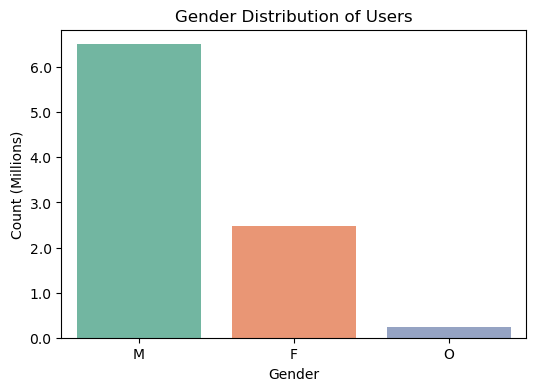

In [112]:
# Create a countplot for the 'User_Gender' column
plt.figure(figsize=(6, 4))
ax = sns.countplot(data=df3, x='User_Gender', palette='Set2')
ax.yaxis.set_major_formatter(FuncFormatter(millions_formatter))
plt.title('Gender Distribution of Users')
plt.xlabel('Gender')
plt.ylabel('Count (Millions)')
plt.show()

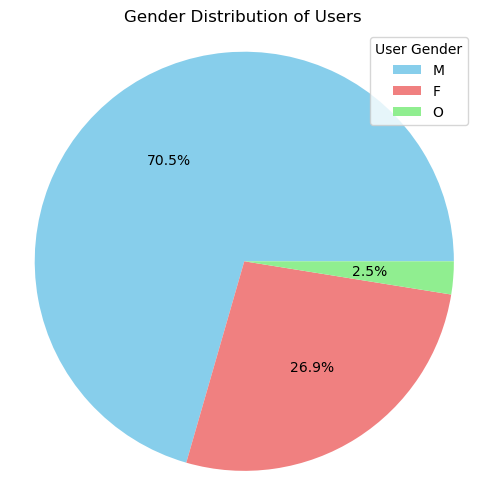

In [113]:
gender_counts = df3['User_Gender'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(gender_counts, autopct='%1.1f%%', colors=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('Gender Distribution of Users')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(gender_counts.index, title='User Gender', loc='upper right')
plt.show()

### User Age Analysis

#### Distribution of Age Groups

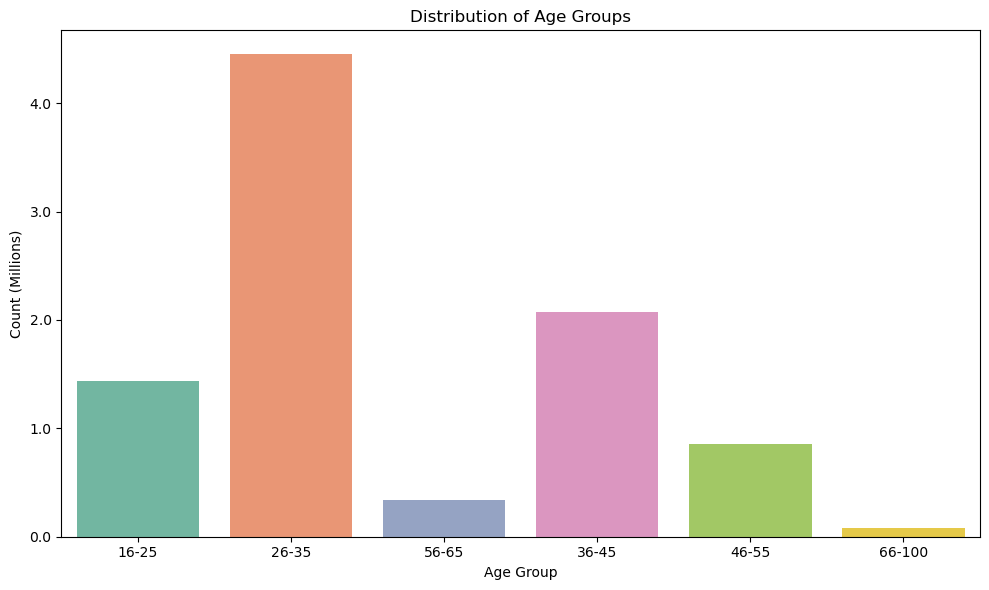

In [114]:
# Create a countplot for the 'Age_Group' column
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df3, x='Age_Group', palette='Set2')
ax.yaxis.set_major_formatter(FuncFormatter(millions_formatter))
plt.title('Distribution of Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count (Millions)')
plt.tight_layout()
plt.show()

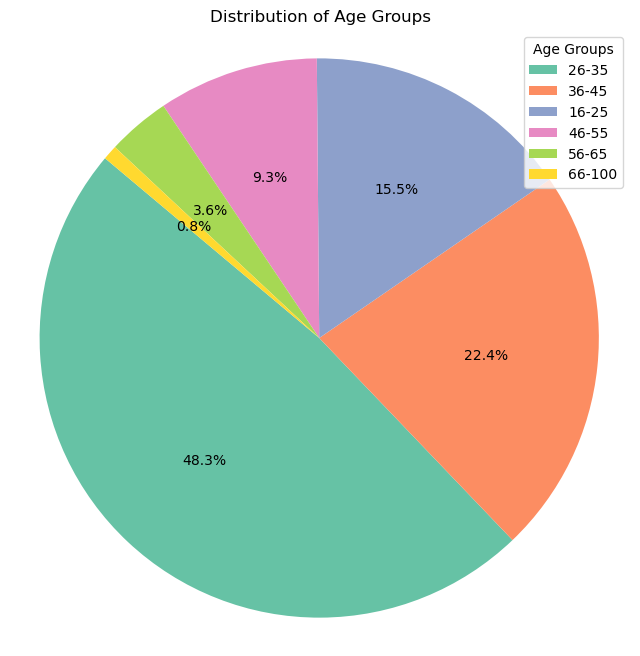

In [115]:
age_group_counts = df3['Age_Group'].value_counts()
plt.figure(figsize=(8, 8))
colors = sns.color_palette('Set2')
plt.pie(age_group_counts, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Distribution of Age Groups')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(age_group_counts.index, title='Age Groups', loc='upper right')
plt.show()

#### Distribution of User Ages

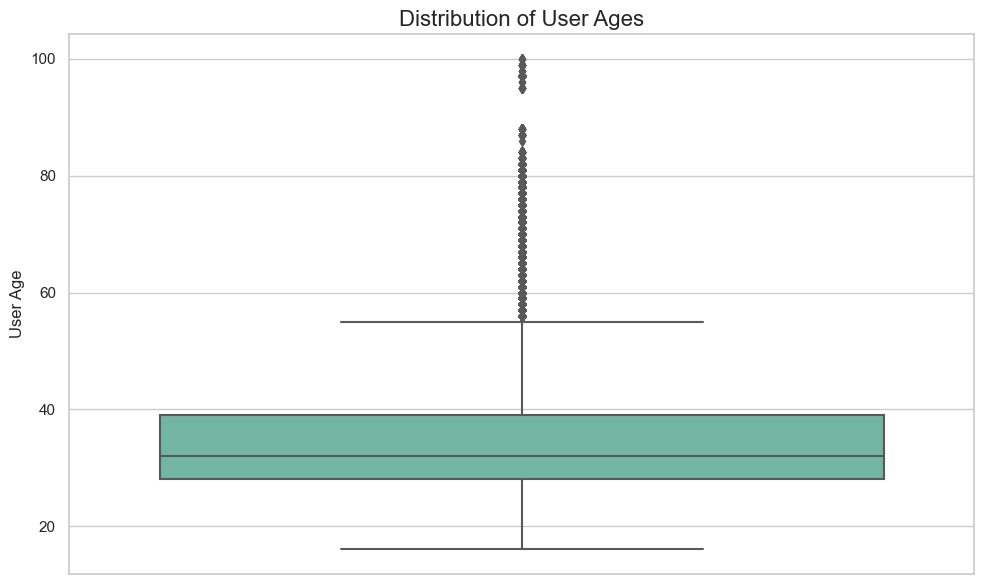

In [116]:
sns.set(style = "whitegrid")
plt.figure(figsize = (10, 6))
sns.boxplot(data = df3, y='User_Age', palette='Set2')
plt.title('Distribution of User Ages', fontsize=16)
plt.ylabel('User Age', fontsize=12)
plt.tight_layout()
plt.show()


In [117]:
df3['Age_Group'].value_counts()

26-35     4448964
36-45     2069251
16-25     1433296
46-55      854870
56-65      334713
66-100      78242
Name: Age_Group, dtype: int64

### Stations Analysis

Station IDs are referenced on the official [Ecobici map website](https://ecobici.cdmx.gob.mx/mapa/), where more detailed information can be found.

In [118]:
df3[df3['Pickup_Station_ID'] == '403']

,User_Gender,User_Age,Bike_ID,Pickup_Station_ID,Return_Station_ID,Pickup_DateTime,Return_DateTime,Ride_Duration_sec,Ride_Duration_min,Ride_Duration_hms,Started_Hour,Weekday,Month,Age_Group,Under_45_minutes


In [119]:
df3['Pickup_Station_ID'].value_counts()

271-272    126683
064         86780
027         62865
019         58882
072         57714
            ...  
580           102
571            70
643            45
569            34
603             5
Name: Pickup_Station_ID, Length: 540, dtype: int64

In [120]:
df3['Return_Station_ID'].value_counts()

271-272    199117
064         89510
027         63845
029         63409
043         57684
            ...  
580           104
571            99
643            49
569            39
603            21
Name: Return_Station_ID, Length: 540, dtype: int64

### Bike ID Analysis

In [121]:
df3['Bike_ID'].value_counts().head(20)

6065692    2745
3847787    2728
6331011    2721
3923125    2714
4549192    2714
8646887    2707
8727406    2701
8933368    2683
3821741    2681
4491510    2677
2769024    2673
8099202    2671
8625089    2671
7698483    2669
2416998    2669
8541591    2668
7660483    2668
3547023    2667
8167264    2663
3308814    2658
Name: Bike_ID, dtype: int64

In [122]:
df3['Bike_ID'].value_counts().tail(20)

5309133    14
6653414    14
4097465    13
3236692    13
6004162    12
7528276    11
3651221     8
4352738     7
4759056     7
2739654     6
7389323     6
3925682     6
7955297     5
3820271     5
6842744     5
8310104     5
3834538     4
7883606     2
7749401     1
4083333     1
Name: Bike_ID, dtype: int64

### Ride Duration Analysis

#### Description

In [123]:
df3['Ride_Duration_min'].describe()

count   9219336.0
mean         34.6
std          31.8
min           0.0
25%           9.0
50%          20.0
75%          66.0
max        1438.0
Name: Ride_Duration_min, dtype: float64

The analysis of ride duration data shows a significant difference between the mean (39.69 minutes) and median (26.00 minutes) ride durations, indicating a right-skewed distribution. This suggests that most rides are relatively short, but a few very long rides are pulling up the mean duration.

#### Ride Duration Distribution

As we can see, 41.3% of rides have had a fee of at least $25MXN extra

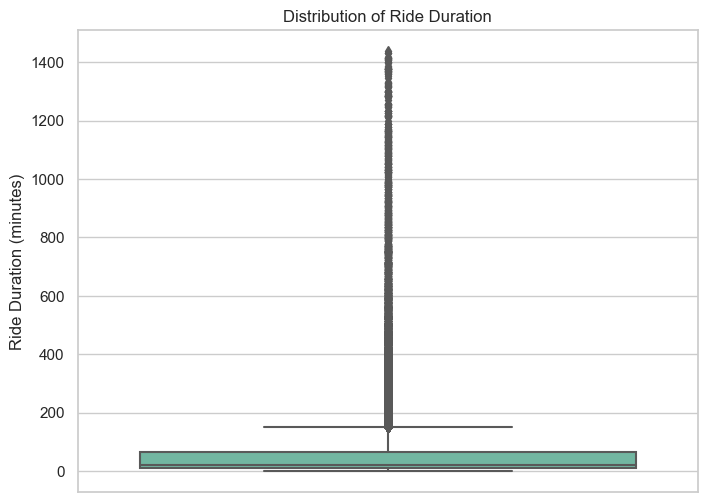

In [124]:
# Create a boxplot for 'Ride_Duration_min'
plt.figure(figsize=(8, 6))
sns.boxplot(data=df3, y='Ride_Duration_min', palette='Set2')
plt.title('Distribution of Ride Duration')
plt.ylabel('Ride Duration (minutes)')

# Show the boxplot
plt.show()

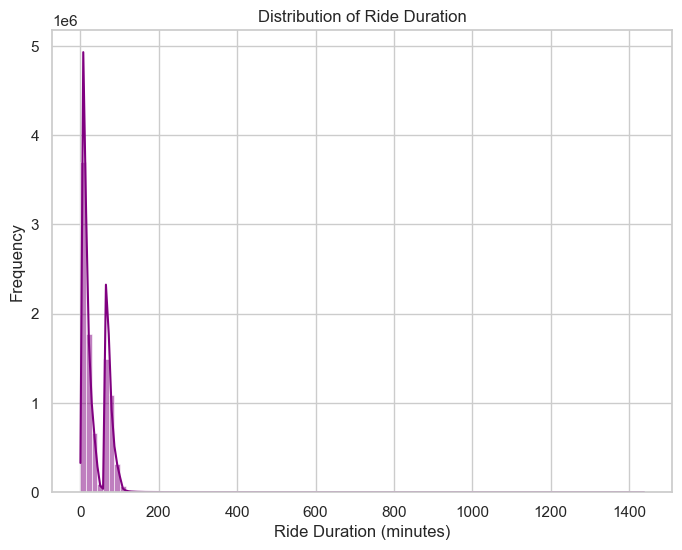

In [125]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df3, x='Ride_Duration_min', bins = 100, kde = True, color = 'purple')
plt.title('Distribution of Ride Duration')
plt.xlabel('Ride Duration (minutes)')
plt.ylabel('Frequency')
plt.show()

Zooming in

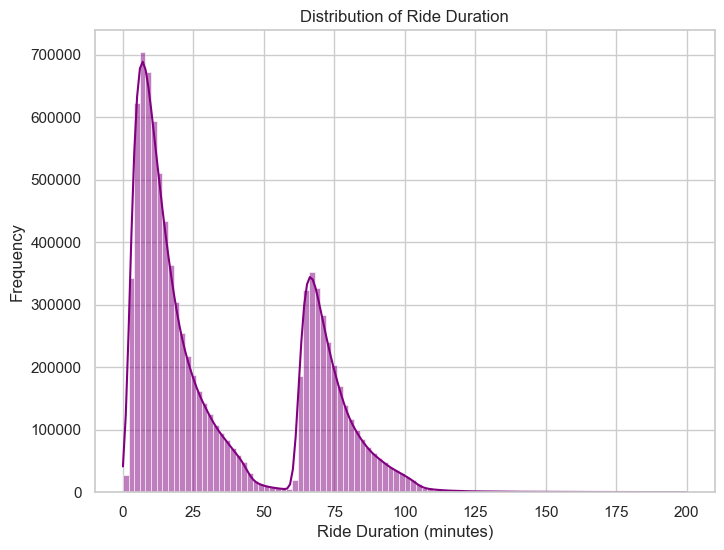

In [126]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df3[(df3['Ride_Duration_min'] >= 0) & (df3['Ride_Duration_min'] <= 200)], x='Ride_Duration_min', bins = 100, kde = True, color = 'purple')
plt.title('Distribution of Ride Duration')
plt.xlabel('Ride Duration (minutes)')
plt.ylabel('Frequency')
plt.show()

Ride durations are predominantly clustered within two ranges: 0 to 30 minutes and 60 to 90 minutes. The distinction is evident between standard rides, which remain under 45 minutes and incur no additional fees, and those exceeding 45 minutes, resulting in extra charges. This explains the considerable variability in ride durations, with a marked difference between the mean and median durations.

#### Rides under and over 45 minutes

When users subscribe to any Ecobici plan (1 day, 3 days, 7 days, annual), they are entitled to ride for free if their trip lasts between 0 and 45 minutes. However, if the trip exceeds 45 minutes, additional fees apply. We're gonna visualize the distribution of the rides under and over 45 minutes

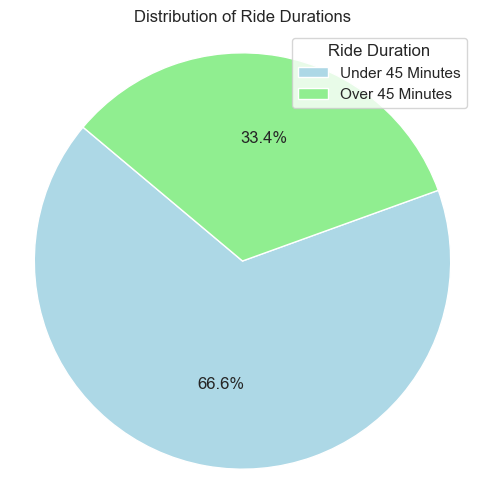

In [127]:
under_45_counts = df3['Under_45_minutes'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(under_45_counts, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightgreen'])
plt.title('Distribution of Ride Durations')
plt.axis('equal')
plt.legend(['Under 45 Minutes', 'Over 45 Minutes'], title='Ride Duration', loc='upper right')
plt.show()

We can notice that 2/3 of rides are under the 45 minute mark without an extra fee. 

#### By Started Hour

In [128]:
df3.groupby(['Started_Hour'])['Ride_Duration_min'].mean().reset_index().sort_values(by = 'Ride_Duration_min', ascending = False)

,Started_Hour,Ride_Duration_min
8,12,36.4
7,11,36.4
14,18,35.9
9,13,35.4
6,10,35.0
13,17,34.9
3,7,34.7
4,8,34.6
15,19,34.6
10,14,34.4


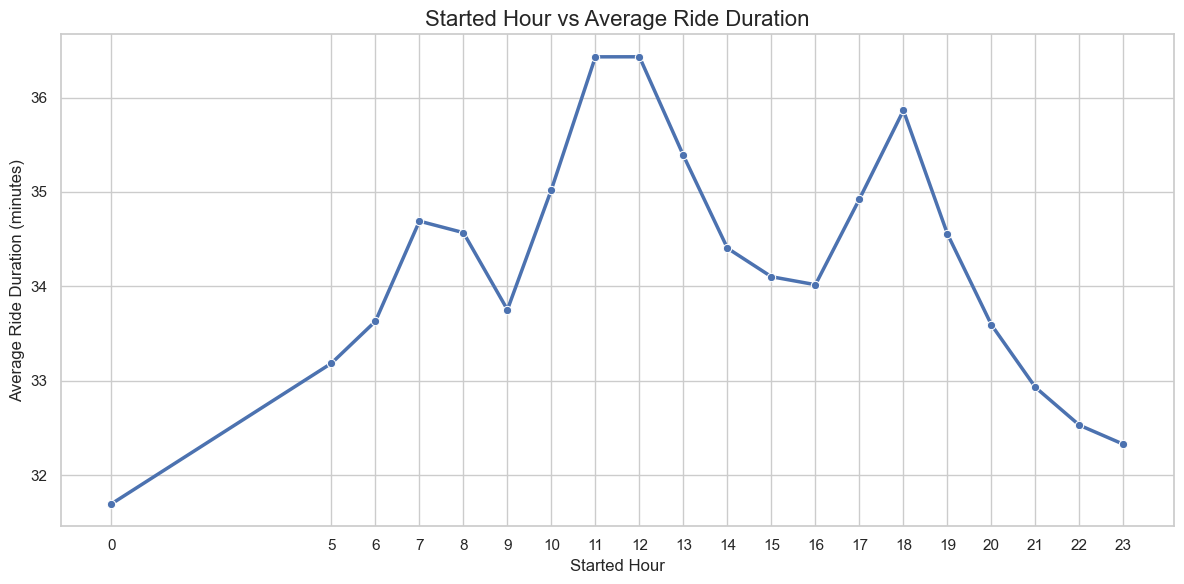

In [129]:
average_duration = df3.groupby(['Started_Hour'])['Ride_Duration_min'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=average_duration, x='Started_Hour', y='Ride_Duration_min', marker= 'o', palette='Set2', linewidth=2.5)

plt.title('Started Hour vs Average Ride Duration', fontsize=16)
plt.xlabel('Started Hour', fontsize=12)
plt.ylabel('Average Ride Duration (minutes)', fontsize=12)
plt.xticks(average_duration['Started_Hour'])

plt.tight_layout()
plt.show()

The analysis of ride durations by the hour of the day highlights several key findings:

- **Peak Durations:** Rides around noon (12:00) and late morning (11:00) have the highest average durations.
- **Morning Commute:** Early morning hours (6:00 to 8:00) also show longer average durations, possibly indicating longer rides during the morning commute.
- **Evening Commute:** Late afternoon to early evening hours (16:00 to 19:00) have elevated average durations, suggesting longer rides during the evening rush.
- **Night Hours:** Ride durations decrease during late evening and night hours, reaching a low at midnight (0:00 hrs).

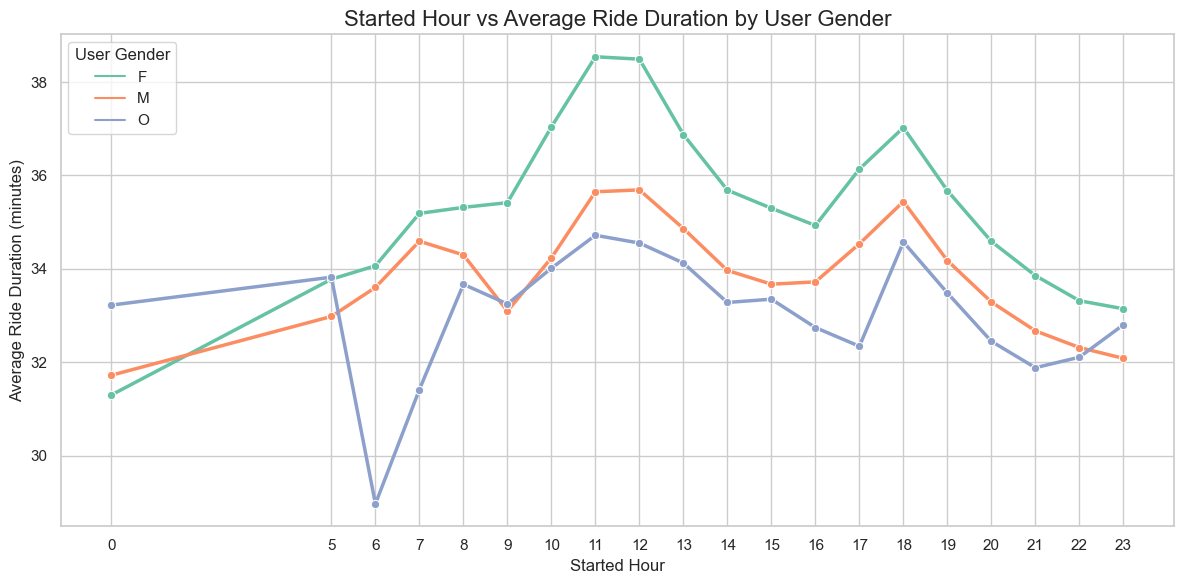

In [130]:
average_duration_gender = df3.groupby(['Started_Hour', 'User_Gender'])['Ride_Duration_min'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=average_duration_gender, x='Started_Hour', y='Ride_Duration_min', hue='User_Gender', marker= 'o', palette='Set2', linewidth=2.5)

plt.title('Started Hour vs Average Ride Duration by User Gender', fontsize=16)
plt.xlabel('Started Hour', fontsize=12)
plt.ylabel('Average Ride Duration (minutes)', fontsize=12)
plt.xticks(df3['Started_Hour'].unique())

plt.legend(title='User Gender', loc='upper left')

plt.tight_layout()
plt.show()

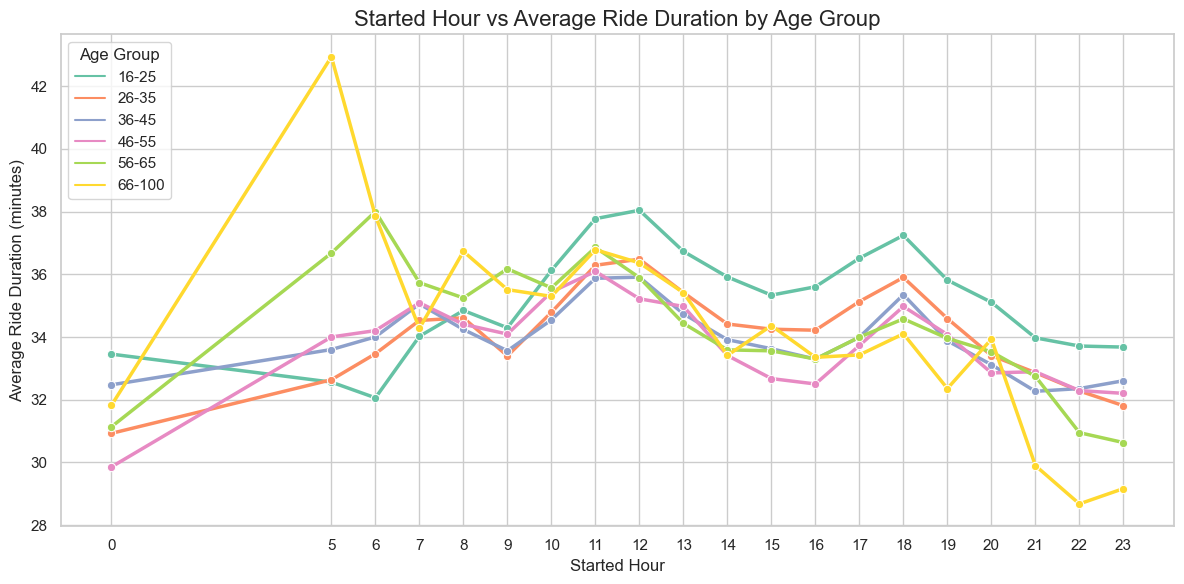

In [131]:
average_duration = df3.groupby(['Started_Hour', 'Age_Group'])['Ride_Duration_min'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=average_duration, x='Started_Hour', y='Ride_Duration_min', hue='Age_Group', marker= 'o', palette='Set2', linewidth=2.5)

plt.title('Started Hour vs Average Ride Duration by Age Group', fontsize=16)
plt.xlabel('Started Hour', fontsize=12)
plt.ylabel('Average Ride Duration (minutes)', fontsize=12)
plt.xticks(df3['Started_Hour'].unique())

plt.legend(title='Age Group', loc='upper left')

plt.tight_layout()
plt.show()


#### By Day of the Week

In [132]:
df3.groupby('Weekday')['Ride_Duration_min'].mean().reset_index().sort_values(by = 'Ride_Duration_min', ascending=False)

,Weekday,Ride_Duration_min
3,Sunday,39.8
2,Saturday,35.1
1,Monday,35.0
0,Friday,34.3
4,Thursday,33.7
6,Wednesday,33.4
5,Tuesday,33.3


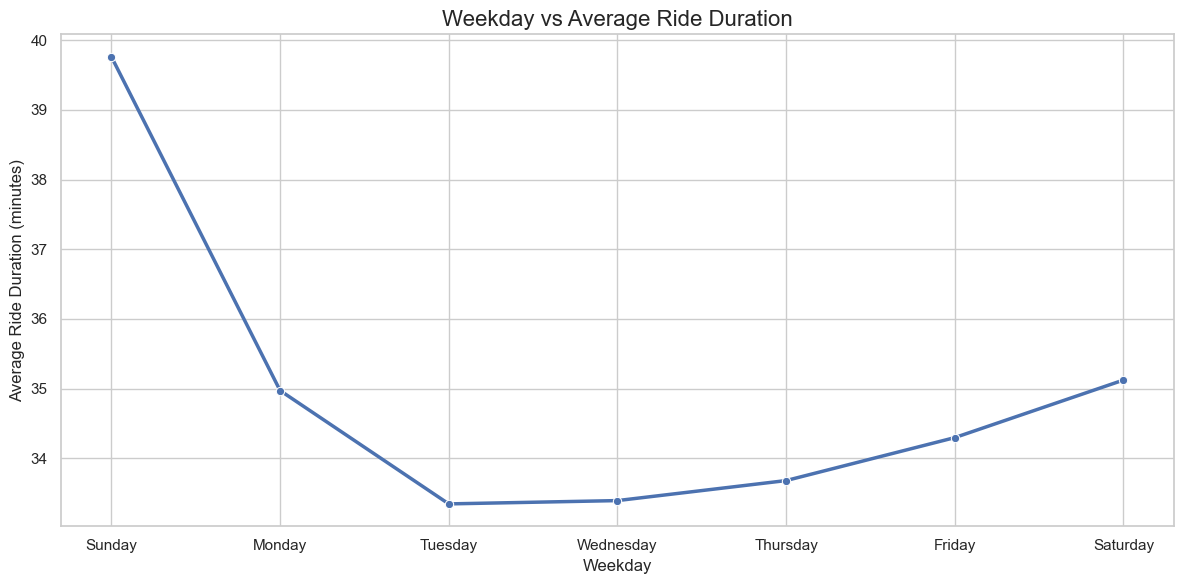

In [133]:
average_duration = df3.groupby(['Weekday'])['Ride_Duration_min'].mean().reset_index()
week_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
average_duration['Weekday'] = pd.Categorical(average_duration['Weekday'], categories=week_order, ordered=True)

plt.figure(figsize=(12, 6))
sns.lineplot(data=average_duration, x='Weekday', y='Ride_Duration_min', marker= 'o', palette='Set2', linewidth=2.5)

plt.title('Weekday vs Average Ride Duration', fontsize=16)
plt.xlabel('Weekday', fontsize=12)
plt.ylabel('Average Ride Duration (minutes)', fontsize=12)

plt.tight_layout()
plt.show()

- **Weekend Analysis:** During weekends, including both Saturday and Sunday, there is a notable increase in average ride durations, with Sunday having the highest. This suggests that users often take longer rides for leisure or relaxed outings. 
- **Weekday Analysis:** On Mondays, average ride durations remain relatively high. This could be attributed to people resuming their daily routines after the weekend. Weekdays from Tuesday to Thursday consistently show the shortest average ride durations.

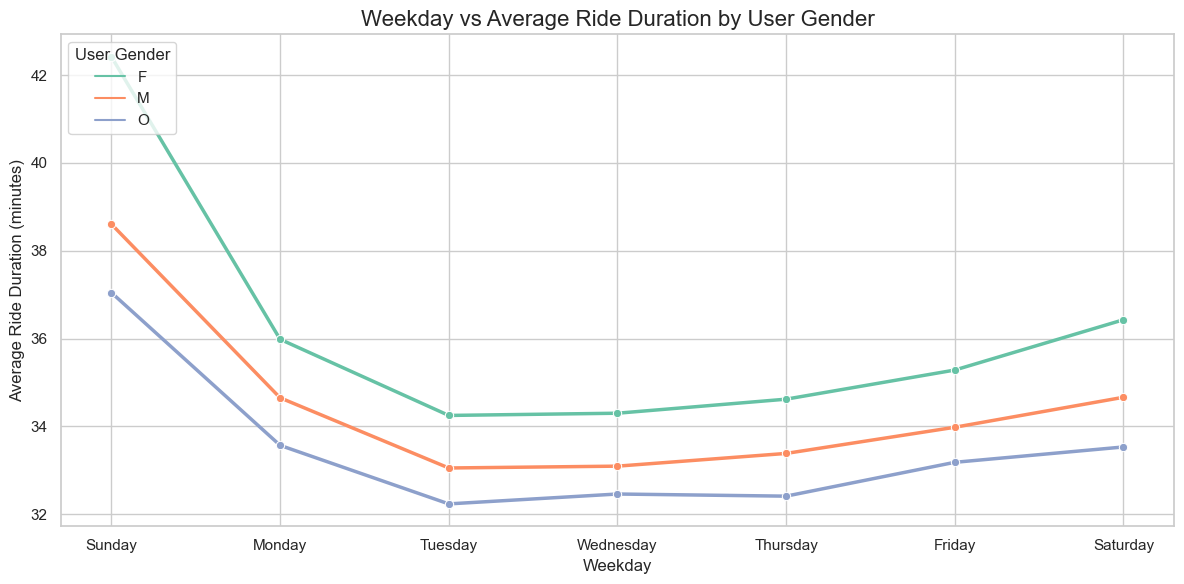

In [134]:
average_duration = df3.groupby(['Weekday', 'User_Gender'])['Ride_Duration_min'].mean().reset_index()
week_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
average_duration['Weekday'] = pd.Categorical(average_duration['Weekday'], categories=week_order, ordered=True)

plt.figure(figsize=(12, 6))
sns.lineplot(data=average_duration, x='Weekday', y='Ride_Duration_min', hue='User_Gender', marker= 'o', palette='Set2', linewidth=2.5)

plt.title('Weekday vs Average Ride Duration by User Gender', fontsize=16)
plt.xlabel('Weekday', fontsize=12)
plt.ylabel('Average Ride Duration (minutes)', fontsize=12)

plt.legend(title='User Gender', loc='upper left')

plt.tight_layout()
plt.show()

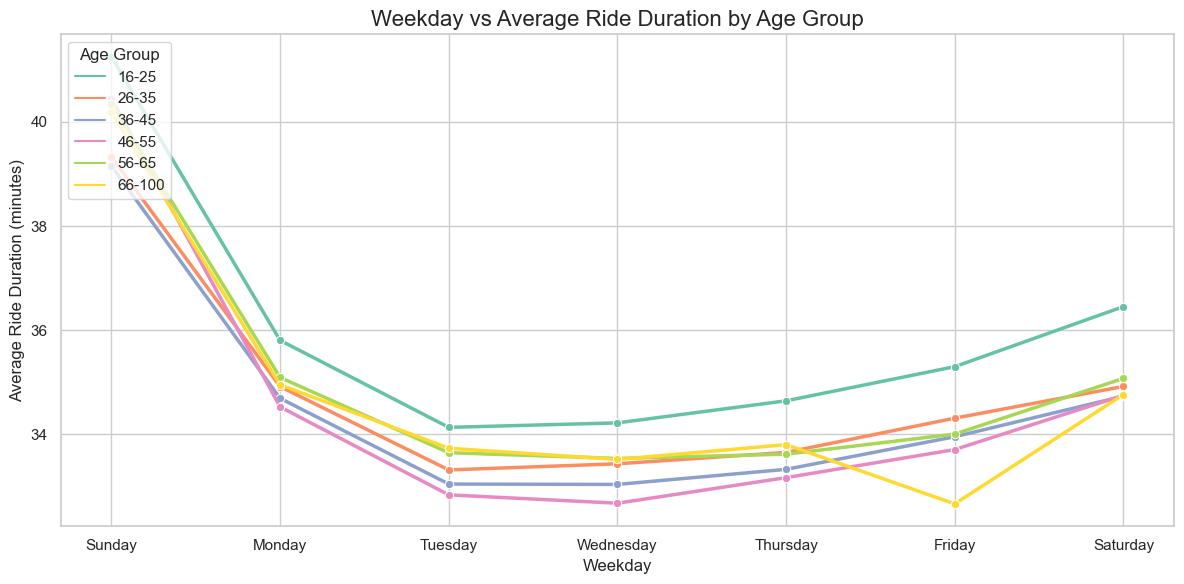

In [135]:
average_duration = df3.groupby(['Weekday', 'Age_Group'])['Ride_Duration_min'].mean().reset_index()
week_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
average_duration['Weekday'] = pd.Categorical(average_duration['Weekday'], categories=week_order, ordered=True)

plt.figure(figsize=(12, 6))
sns.lineplot(data=average_duration, x='Weekday', y='Ride_Duration_min', hue='Age_Group', marker= 'o', palette='Set2', linewidth=2.5)

plt.title('Weekday vs Average Ride Duration by Age Group', fontsize=16)
plt.xlabel('Weekday', fontsize=12)
plt.ylabel('Average Ride Duration (minutes)', fontsize=12)

plt.legend(title='Age Group', loc='upper left')

plt.tight_layout()
plt.show()


#### By Month

In [136]:
df3[df3['Under_45_minutes'] == 1].groupby(['Month'])['Ride_Duration_min'].mean().reset_index().sort_values(by = 'Ride_Duration_min', ascending = False)

,Month,Ride_Duration_min
5,July,19.9
7,November,15.6
8,October,15.5
2,December,15.2
4,January,15.0
3,February,14.8
6,March,14.4
0,April,14.4
9,September,14.1
1,August,13.8


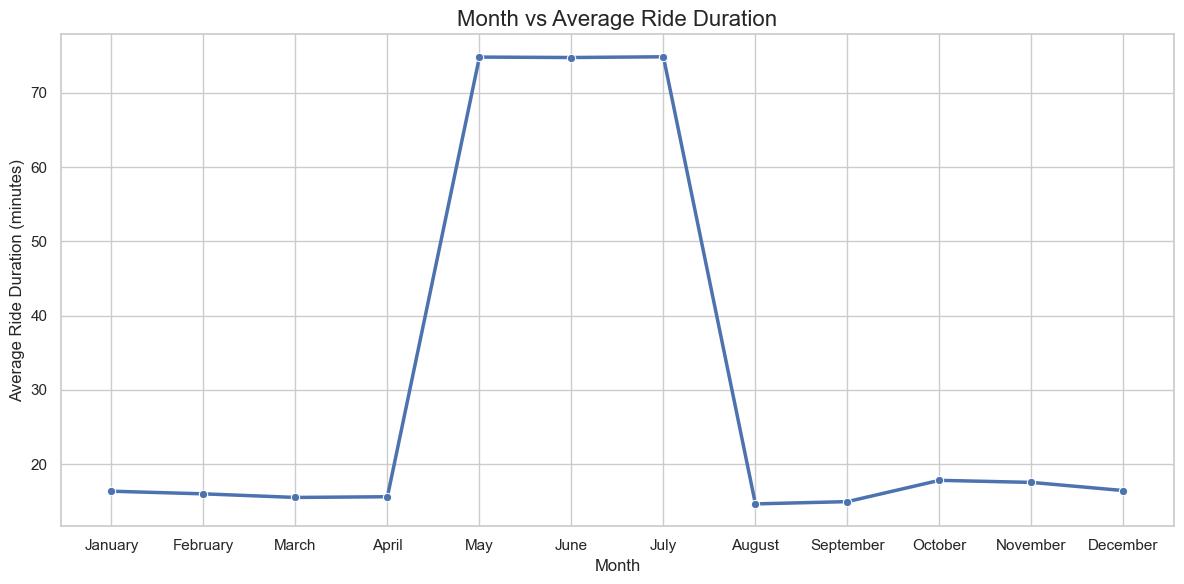

In [137]:
average_duration = df3.groupby(['Month'])['Ride_Duration_min'].mean().reset_index()
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
average_duration['Month'] = pd.Categorical(average_duration['Month'], categories = month_order, ordered = True)

plt.figure(figsize=(12, 6))
sns.lineplot(data=average_duration, x='Month', y='Ride_Duration_min', marker= 'o', palette='Set2', linewidth=2.5)

plt.title('Month vs Average Ride Duration', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Ride Duration (minutes)', fontsize=12)

plt.tight_layout()
plt.show()

The analysis of average ride durations by month reveals:

- **Seasonal Pattern:** Ride durations vary with the seasons. Summer months (July, May, June) have longer rides, likely for leisure or outdoor activities.
- **Winter Shortage:** Winter months (November to February) show shorter rides, possibly due to colder weather.
- **Transition Period:** Spring months (March and April) see slightly longer rides as the weather improves.
- **Outliers:** Some outliers in summer months indicate exceptionally long recreational rides.

In summary, ride durations follow a seasonal pattern, with longer rides in summer and shorter ones in winter. Understanding these trends can help bike-sharing services optimize their operations.

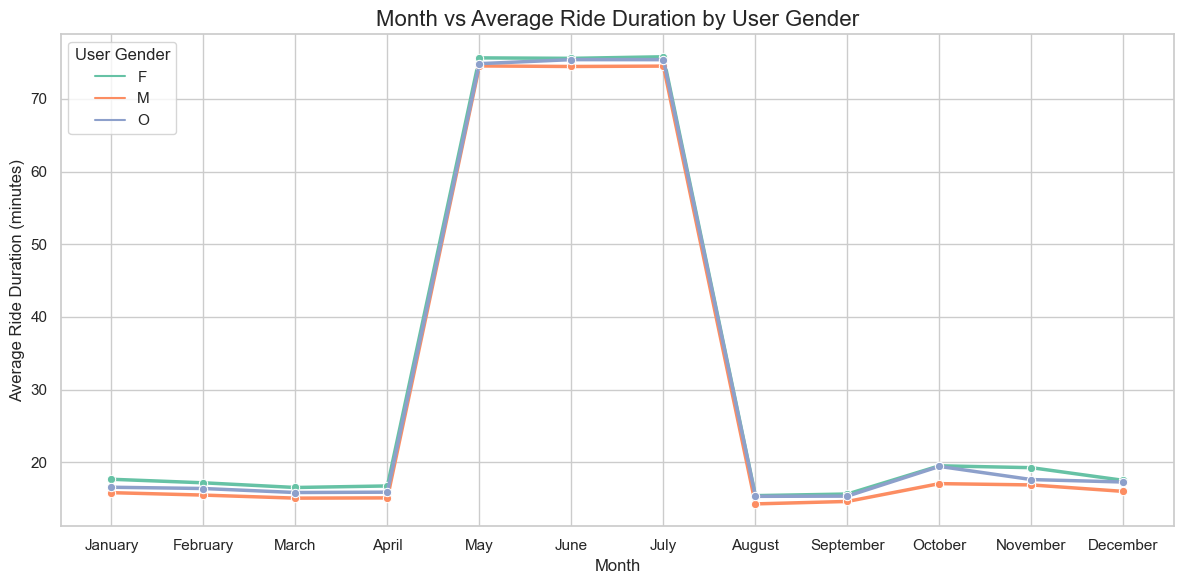

In [138]:
average_duration = df3.groupby(['Month', 'User_Gender'])['Ride_Duration_min'].mean().reset_index()
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
average_duration['Month'] = pd.Categorical(average_duration['Month'], categories = month_order, ordered = True)

plt.figure(figsize=(12, 6))
sns.lineplot(data=average_duration, x='Month', y='Ride_Duration_min', hue = 'User_Gender', marker= 'o', palette='Set2', linewidth=2.5)

plt.title('Month vs Average Ride Duration by User Gender', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Ride Duration (minutes)', fontsize=12)

plt.legend(title='User Gender', loc = 'upper left')

plt.tight_layout()
plt.show()

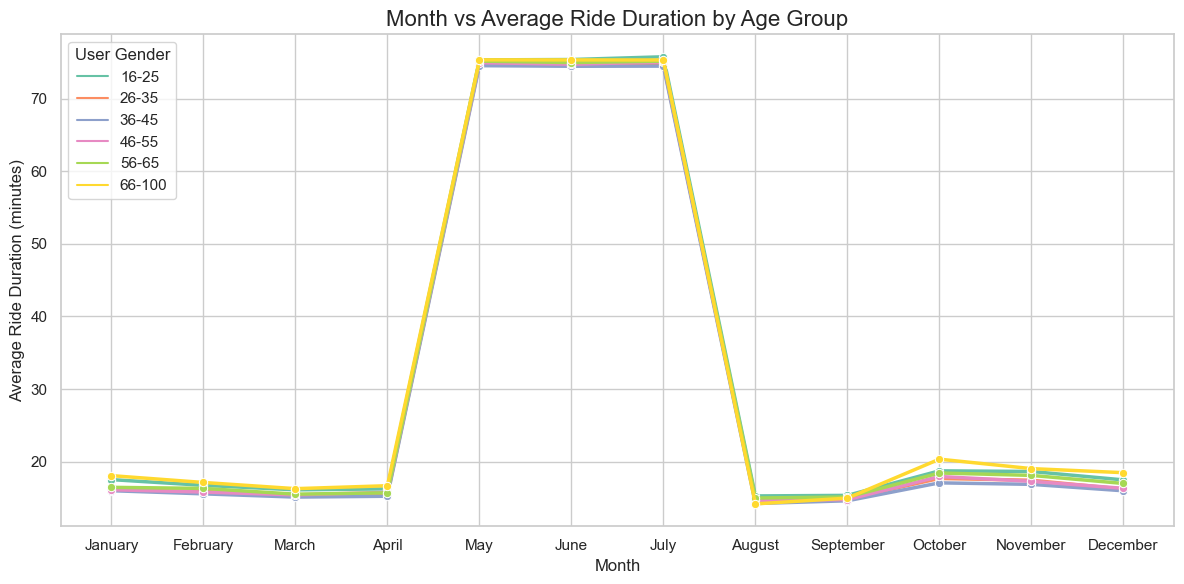

In [139]:
average_duration = df3.groupby(['Month', 'Age_Group'])['Ride_Duration_min'].mean().reset_index()
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
average_duration['Month'] = pd.Categorical(average_duration['Month'], categories = month_order, ordered = True)

plt.figure(figsize=(12, 6))
sns.lineplot(data=average_duration, x='Month', y='Ride_Duration_min', hue = 'Age_Group', marker= 'o', palette='Set2', linewidth=2.5)

plt.title('Month vs Average Ride Duration by Age Group', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Ride Duration (minutes)', fontsize=12)

plt.legend(title='User Gender', loc = 'upper left')

plt.tight_layout()
plt.show()

#### Ride Duration Analysis Conclusions

**Ride Duration by Started Hour:**
- Peak Durations: Rides around noon (12:00) and late morning (11:00) have the highest average durations.
- Morning Commute: Early morning hours (6:00 to 8:00) also show longer average durations, possibly indicating longer rides during the morning commute.
- Evening Commute: Late afternoon to early evening hours (16:00 to 19:00) have elevated average durations, suggesting longer rides during the evening rush.
- Night Hours: Ride durations decrease during late evening and night hours, reaching a low at midnight (0:00 hrs).

**Ride Duration by Day of the Week:**
- Weekend Analysis: During weekends, including both Saturday and Sunday, there is a notable increase in average ride durations, with Sunday having the highest. This suggests that users often take longer rides for leisure or relaxed outings.
- Weekday Analysis: On Mondays, average ride durations remain relatively high. This could be attributed to people resuming their daily routines after the weekend. Weekdays from Tuesday to Thursday consistently show the shortest average ride durations.

**Ride Duration by Month:**
- Seasonal Pattern: Ride durations vary with the seasons. Summer months (July, May, June) have longer rides, likely for leisure or outdoor activities.
- Winter Shortage: Winter months (November to February) show shorter rides, possibly due to colder weather.
- Transition Period: Spring months (March and April) see slightly longer rides as the weather improves.
- Outliers: Some outliers in summer months indicate exceptionally long recreational rides.

In summary, ride durations follow a seasonal pattern, with longer rides in summer and shorter ones in winter. Understanding these trends can help bike-sharing services optimize their operations.

### Total Trips Analysis

#### By Started Hour

In [140]:
df3.groupby('Started_Hour').size().reset_index(name='Total Trips').sort_values(by='Total Trips', ascending= False)

,Started_Hour,Total Trips
14,18,800094
4,8,689029
13,17,677242
11,15,667190
10,14,663770
15,19,658384
12,16,606774
5,9,577078
9,13,572743
8,12,502725


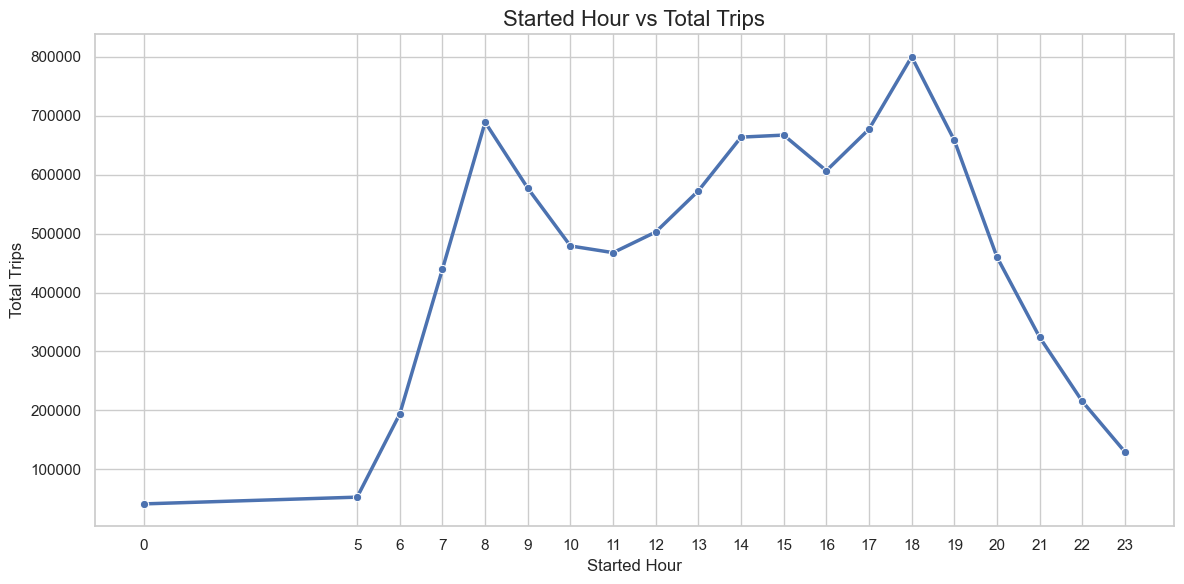

In [141]:
trip_count_by_hour = df3.groupby('Started_Hour').size().reset_index(name = 'Total Trips')

plt.figure(figsize=(12, 6))
sns.lineplot(data=trip_count_by_hour, x='Started_Hour', y='Total Trips', marker='o', palette = 'Set2', linewidth = 2.5)

plt.title('Started Hour vs Total Trips', fontsize=16)
plt.xlabel('Started Hour', fontsize=12)
plt.ylabel('Total Trips', fontsize=12)

plt.xticks(trip_count_by_hour['Started_Hour'])

plt.tight_layout()
plt.show()

- **Hourly Variability:** Bike-sharing trips exhibit hourly variations, with the most rides occurring between 18:00 and 19:00 hrs.
- **Morning Rush:** The morning hours from 8:00 to 9:00 also see a significant number of trips, indicating a likely morning commute pattern.
- **Late-Night Lulls:** Late-night hours between 0:00 and 1:00 hrs experience the fewest trips, suggesting decreased usage during these hours.
- **Consideration:** To optimize system resources and operations, attention should be given to the peak hours during the evening and morning rush.

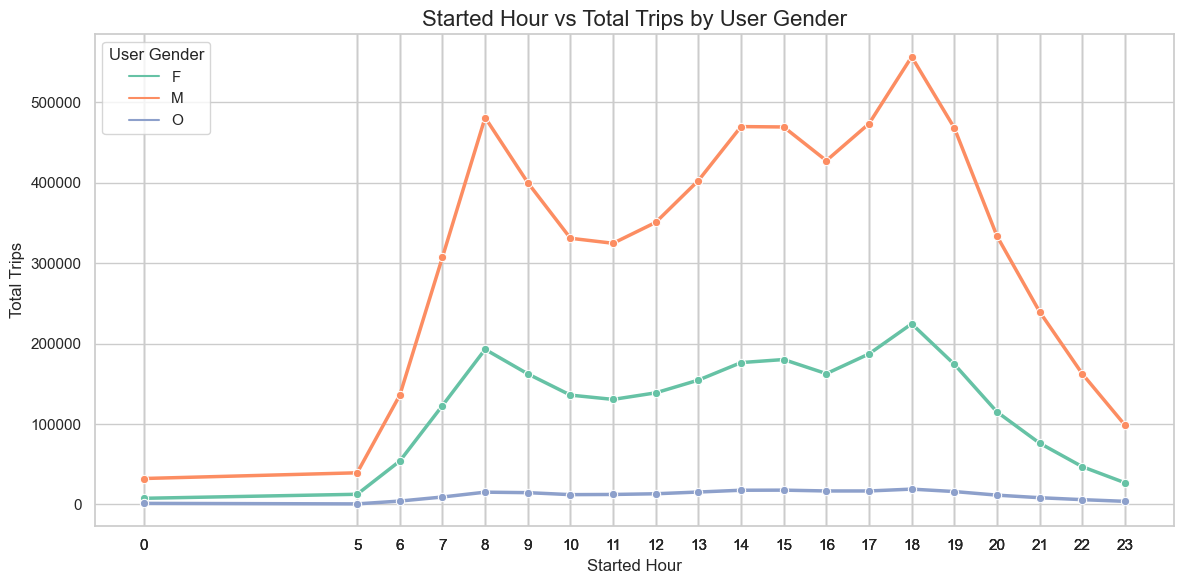

In [142]:
trip_count_by_hour = df3.groupby(['Started_Hour', 'User_Gender']).size().reset_index(name = 'Total Trips')

plt.figure(figsize=(12, 6))
sns.lineplot(data=trip_count_by_hour, x='Started_Hour', y='Total Trips', hue='User_Gender', marker='o', palette = 'Set2', linewidth = 2.5)

plt.title('Started Hour vs Total Trips by User Gender', fontsize=16)
plt.xlabel('Started Hour', fontsize=12)
plt.ylabel('Total Trips', fontsize=12)
plt.legend(title='User Gender', loc = 'upper left')

plt.xticks(trip_count_by_hour['Started_Hour'])

plt.tight_layout()
plt.show()

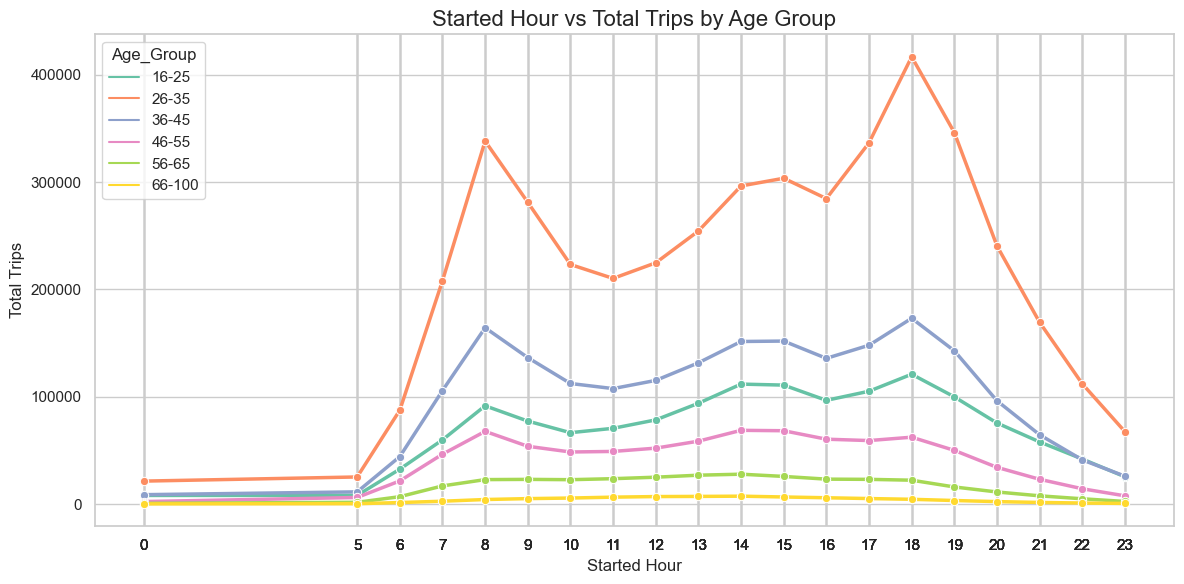

In [143]:
trip_count_by_hour = df3.groupby(['Started_Hour', 'Age_Group']).size().reset_index(name = 'Total Trips')

plt.figure(figsize=(12, 6))
sns.lineplot(data=trip_count_by_hour, x='Started_Hour', y='Total Trips', hue='Age_Group', marker='o', palette = 'Set2', linewidth = 2.5)

plt.title('Started Hour vs Total Trips by Age Group', fontsize=16)
plt.xlabel('Started Hour', fontsize=12)
plt.ylabel('Total Trips', fontsize=12)
plt.legend(title='Age_Group', loc = 'upper left')

plt.xticks(trip_count_by_hour['Started_Hour'])

plt.tight_layout()
plt.show()

#### By Day of the Week

In [144]:
df3.groupby('Weekday').size().reset_index(name='Total Trips').sort_values(by='Total Trips', ascending= False)

,Weekday,Total Trips
6,Wednesday,1527627
5,Tuesday,1513090
4,Thursday,1508929
0,Friday,1451069
1,Monday,1364236
2,Saturday,927375
3,Sunday,927010


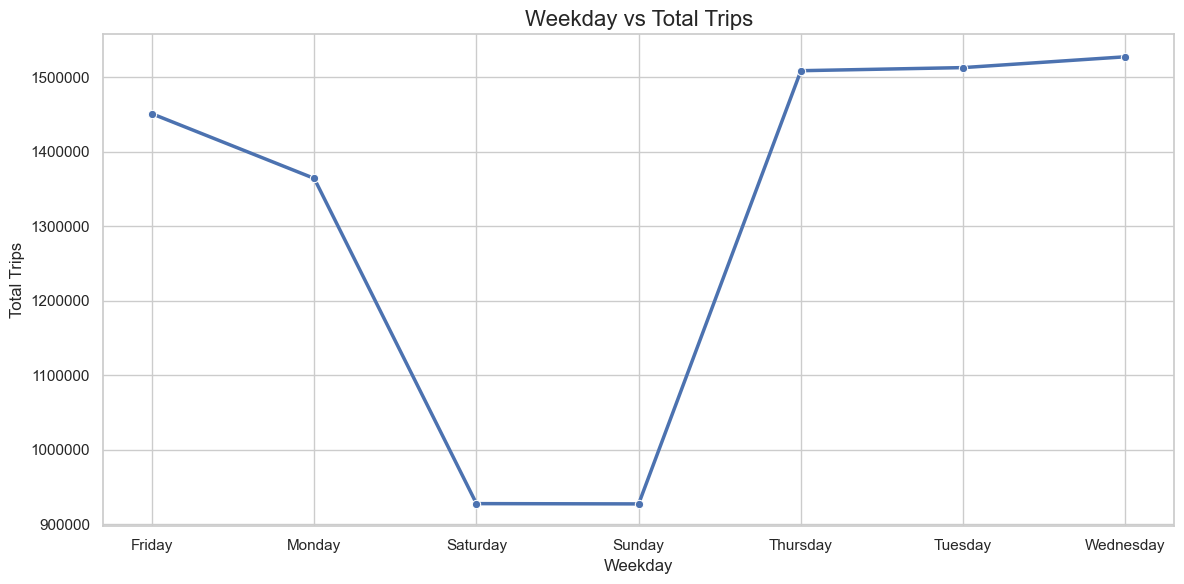

In [145]:
trip_count_by_weekday = df3.groupby('Weekday').size().reset_index(name = 'Total Trips')

plt.figure(figsize=(12, 6))
sns.lineplot(data=trip_count_by_weekday, x='Weekday', y='Total Trips', marker='o', palette = 'Set2', linewidth = 2.5)

plt.title('Weekday vs Total Trips', fontsize=16)
plt.xlabel('Weekday', fontsize=12)
plt.ylabel('Total Trips', fontsize=12)

plt.xticks(trip_count_by_weekday['Weekday'])
plt.ticklabel_format(style='plain', axis='y')

plt.tight_layout()
plt.show()

- **Weekday Analysis:** Wednesday boasts the highest total trips, closely followed by Tuesday and Thursday, indicating midweek popularity.
- **Midweek Peak:** High trip counts on Wednesday suggest significant commuter usage.
- **Workweek Trend:** Tuesday and Thursday also show substantial trips, reflecting consistent workweek patterns.
- **Weekend Usage:** Saturday and Sunday have fewer trips, likely due to reduced work-related travel.
- **Consideration:** Adjusting resources and marketing to boost weekend usage and maintain service quality during busy workweeks may be beneficial.

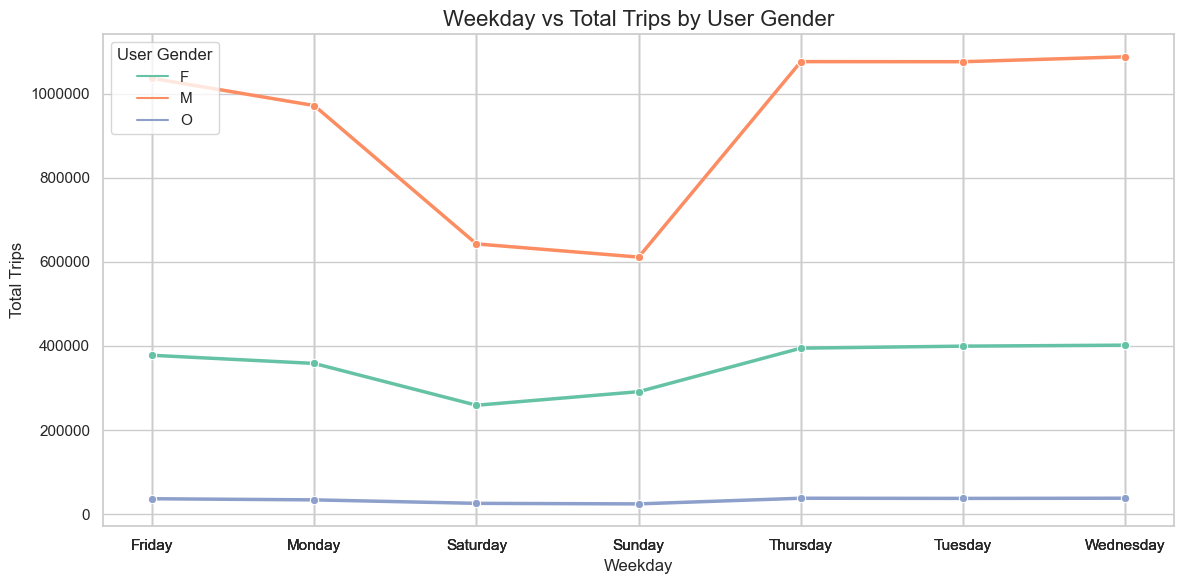

In [146]:
trip_count_by_weekday = df3.groupby(['Weekday', 'User_Gender']).size().reset_index(name = 'Total Trips')

plt.figure(figsize=(12, 6))
sns.lineplot(data=trip_count_by_weekday, x='Weekday', y='Total Trips', hue='User_Gender', marker='o', palette = 'Set2', linewidth = 2.5)

plt.title('Weekday vs Total Trips by User Gender', fontsize=16)
plt.xlabel('Weekday', fontsize=12)
plt.ylabel('Total Trips', fontsize=12)
plt.legend(title='User Gender', loc = 'upper left')

plt.xticks(trip_count_by_weekday['Weekday'])
plt.ticklabel_format(style='plain', axis='y')

plt.tight_layout()
plt.show()

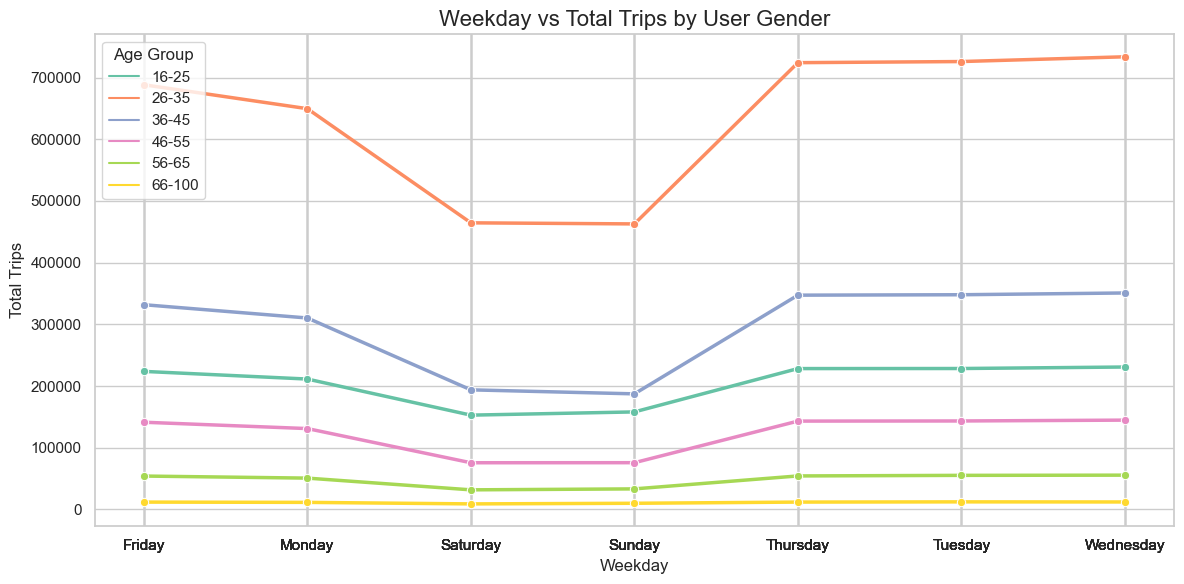

In [147]:
trip_count_by_weekday = df3.groupby(['Weekday', 'Age_Group']).size().reset_index(name = 'Total Trips')

plt.figure(figsize=(12, 6))
sns.lineplot(data=trip_count_by_weekday, x='Weekday', y='Total Trips', hue='Age_Group', marker='o', palette = 'Set2', linewidth = 2.5)

plt.title('Weekday vs Total Trips by User Gender', fontsize=16)
plt.xlabel('Weekday', fontsize=12)
plt.ylabel('Total Trips', fontsize=12)
plt.legend(title='Age Group', loc = 'upper left')

plt.xticks(trip_count_by_weekday['Weekday'])
plt.ticklabel_format(style='plain', axis='y')

plt.tight_layout()
plt.show()

#### By Month

In [148]:
df3.groupby('Month').size().reset_index(name='Total Trips').sort_values(by='Total Trips', ascending= False)

,Month,Total Trips
11,September,1189485
1,August,1109147
6,June,1010011
5,July,999574
8,May,945105
7,March,818004
0,April,810785
3,February,664947
4,January,586411
2,December,431442


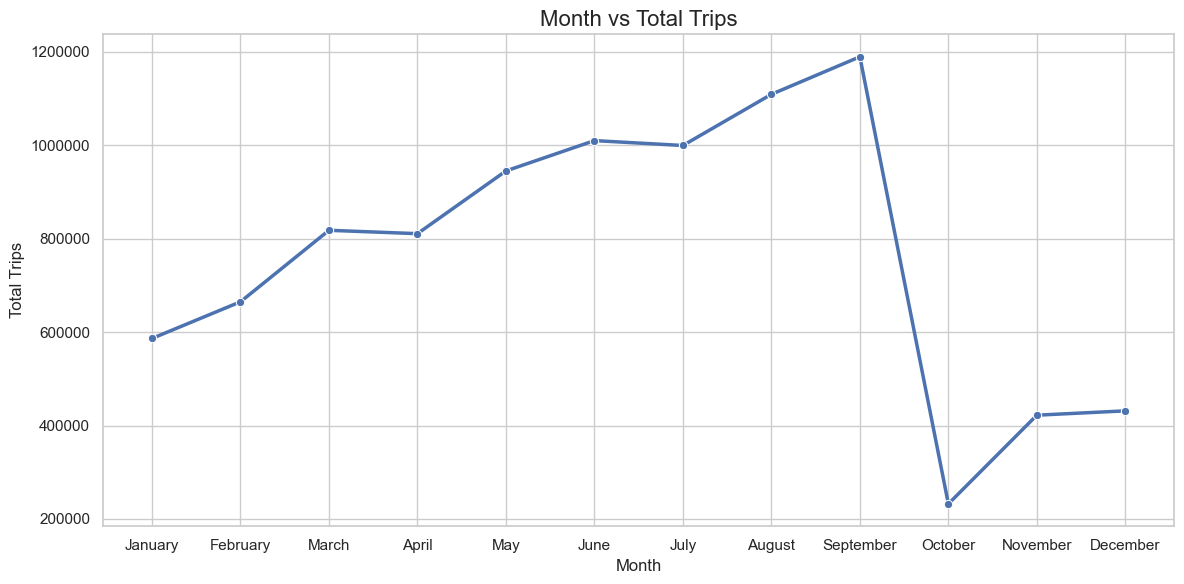

In [149]:
trip_count_by_month = df3.groupby('Month').size().reset_index(name = 'Total Trips')
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
trip_count_by_month['Month'] = pd.Categorical(trip_count_by_month['Month'], categories = month_order, ordered = True)

plt.figure(figsize=(12, 6))
sns.lineplot(data=trip_count_by_month, x='Month', y='Total Trips', marker='o', palette = 'Set2', linewidth = 2.5)

plt.title('Month vs Total Trips', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Trips', fontsize=12)

plt.xticks(trip_count_by_month['Month'])
plt.ticklabel_format(style='plain', axis='y')

plt.tight_layout()
plt.show()

The analysis of the total trips by month provides insights into the usage patterns of the Ecobici bike-sharing system. However, it's important to consider that the last three months (October, November, and December) may not reflect the system's current performance due to potential changes, such as the introduction of a renewed and improved system. Here's an analysis taking this into account:

- **Seasonal Variation:** Bike-sharing trips follow a seasonal pattern, with peak usage during the summer months (June, July, August).
- **Caution for Last Three Months:** Data for October, November, and December may not accurately represent the current system performance, as it predates potential system improvements.
- **Consider Recent Data:** Future analyses should prioritize recent data to assess the impact of system enhancements effectively.

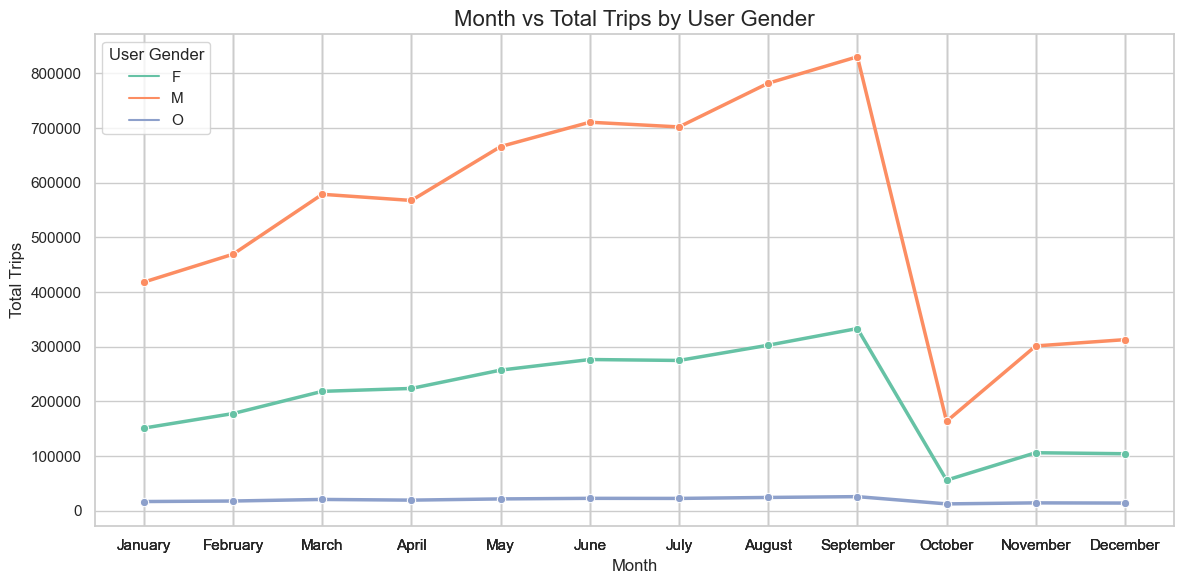

In [150]:
trip_count_by_month = df3.groupby(['Month', 'User_Gender']).size().reset_index(name = 'Total Trips')
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
trip_count_by_month['Month'] = pd.Categorical(trip_count_by_month['Month'], categories = month_order, ordered = True)

plt.figure(figsize=(12, 6))
sns.lineplot(data=trip_count_by_month, x='Month', y='Total Trips', hue='User_Gender', marker='o', palette = 'Set2', linewidth = 2.5)

plt.title('Month vs Total Trips by User Gender', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Trips', fontsize=12)
plt.legend(title='User Gender', loc = 'upper left')

plt.xticks(trip_count_by_month['Month'])
plt.ticklabel_format(style='plain', axis='y')

plt.tight_layout()
plt.show()

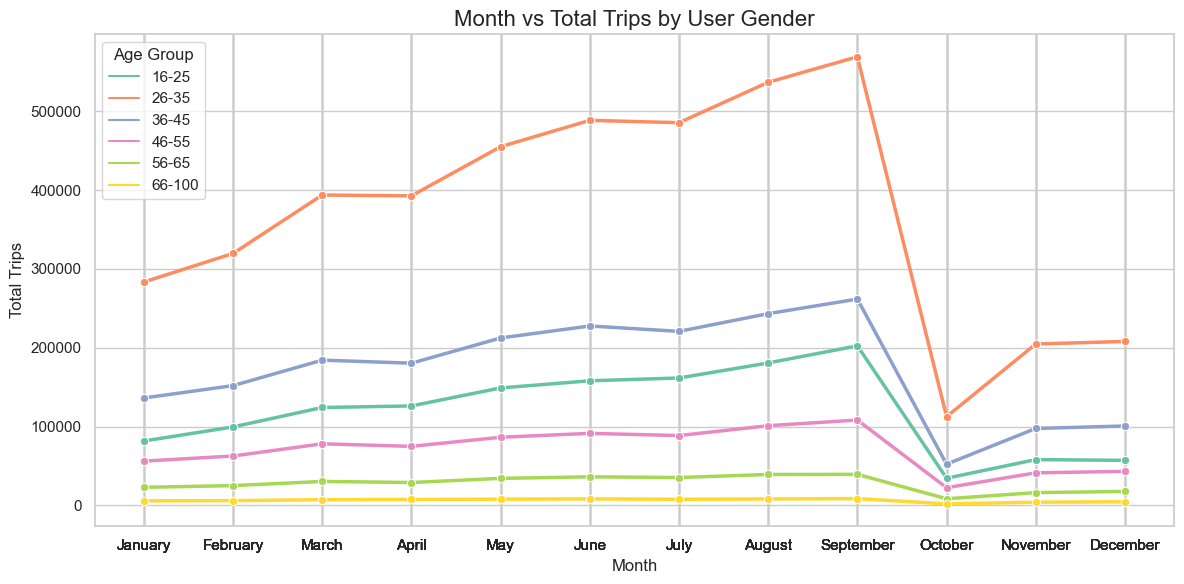

In [151]:
trip_count_by_month = df3.groupby(['Month', 'Age_Group']).size().reset_index(name = 'Total Trips')
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
trip_count_by_month['Month'] = pd.Categorical(trip_count_by_month['Month'], categories = month_order, ordered = True)

plt.figure(figsize=(12, 6))
sns.lineplot(data=trip_count_by_month, x='Month', y='Total Trips', hue='Age_Group', marker='o', palette = 'Set2', linewidth = 2.5)

plt.title('Month vs Total Trips by User Gender', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Trips', fontsize=12)
plt.legend(title='Age Group', loc = 'upper left')

plt.xticks(trip_count_by_month['Month'])
plt.ticklabel_format(style='plain', axis='y')

plt.tight_layout()
plt.show()

#### Total Trips Analysis Conclusions

**Total Trips by Started Hour:**
- Peak Usage: Most trips occur between 18:00 and 19:00, with a secondary peak during the morning commute hours from 8:00 to 9:00.
- Late-Night Lulls: Trip counts are lower during late-night hours (0:00 to 1:00).
- Optimization: Focus on managing peak hours during the evening and morning rush.

**Total Trips by Day of the Week:**
- Midweek Peaks: Wednesday, Tuesday, and Thursday have the highest trip counts.
- Weekend Dip: Trip counts decrease notably on weekends, especially Saturday and Sunday.
- Resource Planning: Consider resource allocation and strategies to boost weekend usage.

**Total Trips by Month:**
- Seasonal Variation: Trips peak in the summer months (June, July, August) and decrease in winter months.
- Caution for Last Three Months: Data from October, November, and December may not fully represent current system performance due to potential changes.
- Focus on Recent Data: Prioritize recent data for assessing system impact and operational decisions.